# Patient Network Analysis: Exploration and Visualization  (Arangspice)

## Introduction

This notebook documents the development and exploration of a patient network analysis tool.  The goal of this project is to provide a user-friendly interface for querying and visualizing relationships between patients, their conditions, and related observations.  This tool leverages a combination of techniques, including:

*   **Network Analysis:**  Using the `networkx` library, we construct and analyze a graph representing the connections between patients based on shared conditions, locations, or other relevant factors.
*   **Natural Language Processing (NLP):**  The system allows users to interact with the data using natural language queries. A "smart router" (whose implementation is assumed to be in separate modules) interprets these queries and directs them to the appropriate analysis function.
*   **Data Visualization:**  `matplotlib` is used to generate visualizations of the patient network, highlighting influential patients, clusters, and other key features.  These visualizations are presented within a `gradio` interface.
*   **Interactive Interface:**  A `gradio` web application provides an intuitive way for users to enter queries and view both textual analysis results and network visualizations.

This notebook will cover the following key aspects:

1.  **System Architecture:**  An overview of the components and their interactions, including the smart router, database access, and visualization generation.
2.  **Query Processing:**  Explanation of how user queries are parsed, classified, and routed to the appropriate analysis methods.
3.  **Network Visualization Logic:** Details of the `generate_network_visualization` function, including node and edge creation, layout algorithms, and styling.
4.  **Gradio Interface Design:**  Description of the `gradio` interface, including input fields, output displays, and event handling.
5.  **Example Queries and Results:**  Demonstration of various query types and their corresponding outputs, showcasing the capabilities of the tool.
6. **Testing and robustness:** Testing of edge cases, and other potential errors.
7.  **Future Enhancements:**  Discussion of potential improvements and extensions to the system, such as incorporating more sophisticated NLP techniques, advanced network analysis algorithms, and improved data handling.

The code within this notebook assumes the presence of external modules and functions (`analyze_patient_network`, `build_patient_graph`, `query_graph_with_smart_router`, `db`, `model`) that handle the core data processing and analysis logic.  These are treated as "black boxes" within this notebook, focusing on the integration and user-facing aspects of the system. The primary focus is on the Gradio application and visualization generation.

This project aims to provide a valuable tool for researchers, healthcare professionals, and anyone interested in exploring the complex relationships within patient populations. By combining network analysis, NLP, and interactive visualization, we can gain insights into disease patterns, identify influential individuals, and improve our understanding of patient health.

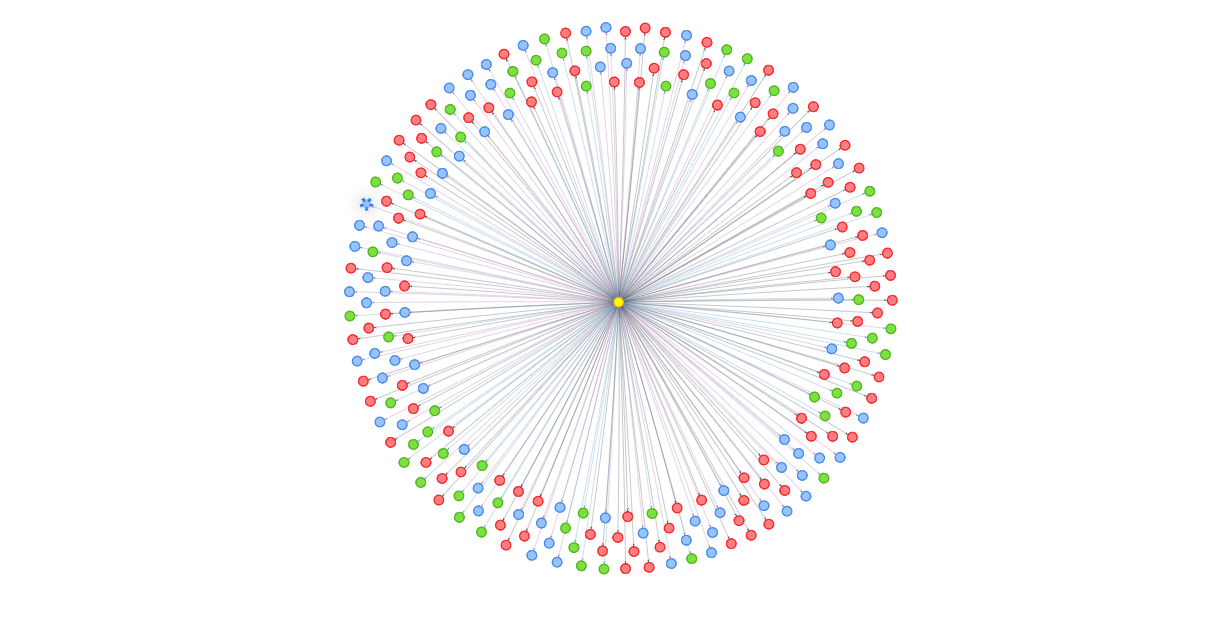

```python
# 🚀 Arangspice.ipynb: Key Concepts & Code Highlights

# This notebook combines ArangoDB, LangChain, and NetworkX for health data analysis. Here's a breakdown of the key parts:

# ## 1. Installations 📦

# ```python
# # Core libraries (PyTorch, ArangoDB, NetworkX, LangChain, Gradio, RAPIDS cuGraph)
# !pip install ...
# ```

# Installs all necessary packages.  Crucially, this includes libraries for machine learning (PyTorch), graph databases (ArangoDB, `nx-arangodb`), graph analysis (NetworkX, `nx-cugraph`), LLM interaction (LangChain), and UI creation (Gradio).

# ## 2. LangChain Tools 🛠️

# Two key LangChain tools are defined:

# *   **`text_to_aql_to_text(query: str) -> str`**:  Converts natural language to AQL (ArangoDB Query Language), executes the query, and returns a natural language response.
#     ```python
#     @tool
#     def text_to_aql_to_text(query: str) -> str:
#         # ... (Uses LLM to generate AQL, then ArangoGraphQAChain to execute) ...
#     ```

# *   **`text_to_nx_algorithm_to_text(query: str) -> str`**: Converts natural language to NetworkX code for graph analysis, executes it, and returns a natural language response. (This part is incomplete in your notebook).
#     ```python
#     @tool
#     def text_to_nx_algorithm_to_text(query: str) -> str:
#       #Calls an undefined function
#       result = analyze_patient_network(db, query, model)
#     ```

# ## 3. ArangoDB Connection & Graph Setup ⚙️

# ```python
# db = ArangoClient(hosts="ARANGO_HOST").db(...)
# datasets = Datasets(db)
# datasets.load("SYNTHEA_P100")
# G_adb = nxadb.Graph(name="SYNTHEA_P100", db=db)
# ```

# Connects to your ArangoDB database, loads the `SYNTHEA_P100` dataset, and creates a NetworkX graph object (`G_adb`) representing the database.  This allows both AQL and NetworkX operations.

# ## 4. Agent Creation 🤖

# ```python
# from langgraph.prebuilt import create_react_agent

# tools = [text_to_aql_to_text, text_to_nx_algorithm_to_text]

# def query_graph(query):
#     llm = model
#     app = create_react_agent(llm, tools)
#     # ...
# ```

# Creates a LangChain agent (`create_react_agent`) that can use the defined tools and an LLM to process user queries.  The `query_graph` function provides a simple interface to interact with the agent.

# ## 5. Smart Query Router 🤔

# ```python
# def query_graph_with_smart_router(query):
#     # ... (Uses regular expressions to categorize the query) ...
#     if matched_category == 'location_distribution':
#         # ...
#     elif matched_category == 'influential_patients':
#        # ... text_to_nx_algorithm_to_text(query)
#     elif matched_category == 'condition_analysis':
#         # ... text_to_aql_to_text(query)
#     # ...
# ```

# This function attempts to intelligently route the query to the most appropriate tool (or a specific function) based on pattern matching.  It's a more sophisticated way to handle user input than just passing everything to the agent.

# ## 6. Database Check & Geographic Analysis 🌍

# ```python
# def comprehensive_db_check(db_connection):
#   #Checks fields using AQL

# def get_geographic_condition_data(db_connection, condition=None, limit=1000):
#     # ... (AQL query to get patient geographic data) ...

# def get_condition_by_state(db_connection, top_n_conditions=5):
#   #Retrieves and processes geographic information.

# def create_geographic_visualizations(db_connection):
#  #Creates visualizations

# def enhance_dashboard_with_geographic_data(db_connection, existing_dashboard_data=None):
#   #Combines data

# def display_enhanced_dashboard(dashboard_data):
#  #Displays dashboard

# def create_enhanced_gradio_interface(db_connection):
#  #Creates gradio interface
# ```

# These functions perform:

# *   **Database structure check** (`comprehensive_db_check`): Uses AQL to examine the available data fields.
# *   **Geographic data retrieval**:  `get_geographic_condition_data` and `get_condition_by_state` use AQL to fetch patient data with location and condition information.
# *   **Visualization**: `create_geographic_visualizations` uses `plotly` to create maps and charts.
# *   **Dashboard**:  `enhance_dashboard_with_geographic_data`, `display_enhanced_dashboard` and `create_enhanced_gradio_interface` combines and presents the data, including a Gradio interface.

# ## 7. Gradio Interface 📊

# ```python
# import gradio as gr

# gr.Interface(fn=query_graph_with_smart_router, inputs="text", outputs="text").launch(share=True)
# ```

# Finally, a simple Gradio interface is launched, allowing users to interact with the `query_graph_with_smart_router` function through a web UI.



## Environment Setup and Dependency Installation

This section details the installation of the necessary Python libraries and packages required to run the code in this notebook. We will be using `pip`, the Python package installer, to manage these dependencies.

**Important Notes:**

*   **CUDA Compatibility:** Some installations (e.g., PyTorch, cuGraph) are specifically configured for CUDA 12.1.  Ensure your environment has a compatible NVIDIA GPU and CUDA toolkit installed if you intend to utilize GPU acceleration.  If you don't have a compatible GPU, you may need to adjust the installation commands (e.g., removing the `--index-url` or `--extra-index-url` flags and letting `pip` find CPU-only versions).
* **Upgrade Flags:** The `--upgrade` and `--quiet` flags are used with many commands. `--upgrade` ensures you have the latest versions of packages, and `--quiet` reduces the verbosity of the output during installation.
*   **Virtual Environments:** It is highly recommended to use a virtual environment (e.g., `venv` or `conda`) to isolate the project's dependencies and avoid conflicts with other Python projects on your system.

**Package Installations:**

The following commands install the required libraries:



In [ ]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
%pip install arango-datasets
%pip install nx-arangodb
%pip install --upgrade --quiet  python-arango # The ArangoDB Python Driver
!pip install gradio
%pip install --upgrade --quiet  langchain_google_vertexai
%pip install --upgrade --quiet  langchain_community
%pip install --upgrade --quiet  langchain-google-genai
!pip install langchain
!pip install langgraph
# Install RAPIDS cuGraph
!pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com
!pip install pandas numpy matplotlib holoviews hvplot datashader panel bokeh litellm

# NetworkX and cuGraph Integration

This notebook demonstrates a basic setup for using `networkx` with potential GPU acceleration via `cugraph`.

## Code Explanation

The following code performs two main actions:

1.  **Setting the `NX_CUGRAPH_AUTOCONFIG` Environment Variable:**

    ```python
    ------------%env NX_CUGRAPH_AUTOCONFIG=True
    ```

    *   **`%env`**: This is a "magic command" in IPython/Jupyter environments. It's used to set environment variables.  It is important to note that the dashes that appear before it are not part of the command.
    *   **`NX_CUGRAPH_AUTOCONFIG=True`**: This sets the environment variable `NX_CUGRAPH_AUTOCONFIG` to `True`.  This variable is crucial for enabling automatic dispatching of `networkx` function calls to the `cugraph` library.  `cugraph` is a RAPIDS library that provides GPU-accelerated graph algorithms. When this variable is set, `networkx` will automatically try to use `cugraph` for any supported algorithms, potentially leading to significant performance improvements, especially for large graphs. If a function is called that cuGraph supports, then NetworkX redirects the function call to nx-cugraph automatically, otherwise it falls back to other backends or defaults to the standard Networkx implementation. This provides up to 500x speedups for some algorithms on larger graphs.

    **Key Benefit:** Zero-code-change acceleration. You don't need to modify your existing `networkx` code to potentially benefit from GPU acceleration.

2.  **Importing the `networkx` Library:**

    ```python
    import networkx
    ```
    This line imports the `networkx` library, making its functions and classes available for use in your notebook. `networkx` is a powerful Python library for creating, manipulating, and analyzing graphs (networks of nodes and edges).

## What is NetworkX?

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. It provides:

*   Data structures for graphs, digraphs, and multigraphs.
*   Many standard graph algorithms.
*   Network structure and analysis measures.
*   Generators for classic graphs, random graphs, and synthetic networks.
*   Nodes can be "anything" (e.g., text, images, XML records).
*   Edges can hold arbitrary data (e.g., weights, time-series).
*   And more.

## What is cuGraph?

cuGraph is part of the RAPIDS ecosystem, a suite of open-source software libraries and APIs for executing data science pipelines entirely on GPUs.  cuGraph specifically focuses on GPU-accelerated graph analytics.

## How `NX_CUGRAPH_AUTOCONFIG` Works with `networkx` and `cugraph`

NetworkX (version 3.2+, but 3.4+ is recommended) has a dispatching mechanism that allows it to use external backends for certain calculations.  `nx-cugraph` is a NetworkX backend. By setting `NX_CUGRAPH_AUTOCONFIG=True`, you're telling `networkx`:

1.  "If you encounter a graph algorithm that `cugraph` can handle, use `cugraph` instead of your default (CPU-based) implementation."
2. "If cugraph is not available or the algorithm is not supported, then use the default Networkx implementation."

This is all done *transparently* to the user.

## Alternative to `NX_CUGRAPH_AUTOCONFIG`: Explicit Backend

Instead of using the environment variable, you can explicitly specify the backend for individual `networkx` function calls using the `backend` keyword argument:

```python
# Example (assuming you have a graph 'G')
# import networkx as nx
# result = nx.betweenness_centrality(G, k=10, backend="cugraph")

In [ ]:
%env NX_CUGRAPH_AUTOCONFIG=True
import networkx

In [ ]:
from IPython.display import Markdown, display
from langchain import LLMChain
from langchain.prompts import ChatPromptTemplate
from langchain_community.tools import TavilySearchResults
from langchain_core.output_parsers import StrOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_vertexai import ChatVertexAI
from langchain_core.tools import tool

In [ ]:
import os
from typing import Dict, List, Union, Optional, Any
import litellm

class LLMRouter:
    def __init__(self, default_model: str = "huggingface/meta-llama/Meta-Llama-3.1-8B-Instruct"):
        """
        Initialize the LLM Router with model configurations for healthcare analytics.
        Uses only Hugging Face models and retrieves API key from Kaggle secrets.
        
        Args:
            default_model: The default model to use if no specific routing rules match
        """
        self.default_model = default_model
        
        # Set up model configurations (only HuggingFace models)
        self.models = {
            "general": "huggingface/meta-llama/Meta-Llama-3.1-8B-Instruct",
            "clinical": "huggingface/mistralai/Mistral-7B-Instruct-v0.3",
            "research": "huggingface/google/gemma-7b-it",
            "summarization": "huggingface/mistralai/Mistral-7B-Instruct-v0.3"
        }
        
        # Define keywords that would route to specific models
        self.routing_keywords = {
            "clinical": ["diagnosis", "patient", "treatment", "clinical", "symptoms", "medical record"],
            "research": ["research", "study", "clinical trial", "literature", "published", "analysis"],
            "summarization": ["summarize", "summary", "brief", "overview", "condense", "digest"]
        }
        
        # Set up the API key from Kaggle secrets
        self._setup_api_key()

    def _setup_api_key(self):
        """Retrieve and set the Hugging Face API key from Kaggle secrets."""
        try:
            # Import Kaggle's UserSecretsClient
            from kaggle_secrets import UserSecretsClient
            
            # Get the Hugging Face API key from Kaggle secrets
            user_secrets = UserSecretsClient()
            hf_api_key = user_secrets.get_secret("HUGGINGFACE_API_KEY")
            
            # Set the API key for litellm to use
            os.environ["HUGGINGFACE_API_KEY"] = hf_api_key
            
            print("Successfully loaded Hugging Face API key from Kaggle secrets")
        except Exception as e:
            print(f"Error retrieving Hugging Face API key from Kaggle secrets: {str(e)}")
            print("Please ensure you've added the HUGGINGFACE_API_KEY to your Kaggle secrets")
            print("You can add it by going to Kaggle > Account > Secrets and adding a new secret")

    def _determine_model(self, prompt: str) -> str:
        """
        Determine which model to use based on the prompt content.
        
        Args:
            prompt: The user's input prompt
            
        Returns:
            The model identifier to use
        """
        prompt_lower = prompt.lower()
        
        # Check for healthcare domain keywords first
        if any(keyword in prompt_lower for keyword in ["healthcare", "medical", "health", "patient", "clinical"]):
            # Then check for task-specific routing within healthcare
            for model_type, keywords in self.routing_keywords.items():
                if any(keyword in prompt_lower for keyword in keywords):
                    return self.models[model_type]
            
            # Default to clinical model for healthcare topics without specific keywords
            return self.models["clinical"]
        
        # For non-healthcare prompts, route based on task type
        for model_type, keywords in self.routing_keywords.items():
            if any(keyword in prompt_lower for keyword in keywords):
                return self.models[model_type]
                
        # Default model for general queries
        return self.default_model

    def invoke(self, prompt: str, temperature: float = 0.7, max_tokens: int = 1000) -> str:
        """
        Route the prompt to the appropriate Hugging Face model and return the response.
        
        Args:
            prompt: The user's input prompt
            temperature: The sampling temperature
            max_tokens: Maximum tokens to generate
            
        Returns:
            The model's response as a string
        """
        model = self._determine_model(prompt)
        
        try:
            response = litellm.completion(
                model=model,
                messages=[{"content": prompt, "role": "user"}],
                temperature=temperature,
                max_tokens=max_tokens
            )
            
            # Log which model was used
            print(f"Used model: {model}")
            
            # Extract just the content from the response
            return response.choices[0].message.content
            
        except Exception as e:
            print(f"Error with model {model}: {str(e)}")
            # Fallback to default model if the chosen one fails
            if model != self.default_model:
                print(f"Falling back to default model: {self.default_model}")
                return self.invoke(prompt, temperature, max_tokens)
            else:
                return f"Error processing request: {str(e)}"


# Initialize the router
llm_router = LLMRouter()
    
# Example healthcare analytics query
result = llm_router.invoke("Explain the benefits of using multiple LLMs in a healthcare analytics pipeline.")
print(result)

# ArangoDB Querying with Natural Language

This section details the implementation of tools and an agent for interacting with an ArangoDB graph database using natural language queries. It leverages LangChain for integrating a language model, and defines a custom tool (`text_to_aql_to_text`) to translate natural language to AQL (ArangoDB Query Language) and back.

## Code Explanation

The provided code defines two main functions: `text_to_aql_to_text` (a LangChain tool) and `create_patient_analysis_agent` (which creates a LangChain agent). There is a helper function called `query_graph`.

### 1. `text_to_aql_to_text` Tool




In [ ]:
from typing import Any, Dict
# 4. Define the Text to AQL Tool
# Reference: https://python.langchain.com/docs/integrations/graphs/arangodb/
# Reference: https://python.langchain.com/api_reference/community/chains/langchain_community.chains.graph_qa.arangodb.ArangoGraphQAChain.html

def extract_text(response):
    # Access the nested response content and strip whitespace
    return response["response"].choices[0].message.content.strip()


@tool
def text_to_aql_to_text(query: str) -> str:
    """
    This tool converts a natural language query into an AQL query,
    executes it against the ArangoDB graph, and translates the result
    back into natural language.
    """
    llm = llm_router

    # Generate AQL code from the natural language query
    aql_code = llm.invoke(f"""
    I have an ArangoDB graph with the following schema: {arango_graph.schema}.
    I need to answer the following query: {query}.
    Generate the complete AQL code that will execute this query.
    Ensure that the result is stored in a variable called FINAL_RESULT.
    Only output AQL code (no additional commentary).
    Your AQL code:
    """).content.strip()

    print("Generated AQL code:")
    print(aql_code)
    print("-"*10)

    # Use ArangoGraphQAChain to execute the generated AQL query.
    chain = ArangoGraphQAChain.from_llm(
        llm=llm,
        graph=arango_graph,
        verbose=True,
        allow_dangerous_requests=True
    )
    result = chain.invoke(query)
    final_result = str(result["result"])

    # Formulate a natural language response based on FINAL_RESULT.
    result = llm.invoke(f"""
        I have an ArangoDB graph with schema: {arango_graph.schema}.
        I executed the following AQL code to answer the query:
        ---
        {aql_code}
        ---
        The variable FINAL_RESULT is set to: {final_result}.
        Based on this information, generate a short and concise answer to the original query.
        Your response:
    """)
    aql_to_text = extract_text(result)

    return aql_to_text


# Create the agent with both tools
def create_patient_analysis_agent():
    tools = [text_to_nx_algorithm_to_text, text_to_aql_to_text]
    agent = create_react_agent(model, tools)
    return agent

# Function to query the graph using the agent
def query_graph(query):
    agent = create_patient_analysis_agent()
    final_state = agent.invoke({"messages": [{"role": "user", "content": query}]})
    return final_state["messages"][-1].content

# Deep Dive into Patient Network Analysis with ArangoDB, NetworkX, and LangChain

This section provides a detailed explanation of a comprehensive code block that integrates ArangoDB, NetworkX, LangChain, and other libraries to perform in-depth patient network analysis. The code focuses on extracting insights from a healthcare dataset, handling data quality issues (including generating synthetic data), performing graph-based analysis, and leveraging a language model for natural language interaction.

## Code Overview

The provided code performs the following key functions:

1.  **Setup and Initialization:**
    *   Imports necessary libraries (e.g., `re`, `networkx`, `os`, `sys`, `logging`, `IPython.display`, `pandas`, `matplotlib.pyplot`, `arango`, `nx_arangodb`, `langchain`, `gradio`, `random`).
    *   Retrieves API keys and other credentials from `kaggle_secrets`.
    *   Sets environment variables (including enabling Vertex AI usage).
    *   Initializes the language model (`ChatGoogleGenerativeAI`).
    *   Connects to the ArangoDB database and loads the `SYNTHEA_P100` dataset.
    *   Creates `ArangoGraph` and `nx_arangodb.Graph` objects to represent the graph.
    *   Prints the graph schema.
    *   Enables NetworkX graph caching.

2.  **`analyze_patient_network` Function:**
    *   This is the core function that performs the patient-focused analysis.
    *   **Logging:** Sets up logging to track the analysis process.
    *   **Synthetic Data Tracking:** Initializes a dictionary (`synthetic_data_stats`) to track the use of synthetic data for location and condition generation.
    *   **CuGraph Check:** Checks if CuGraph acceleration is enabled via the `NX_CUGRAPH_AUTOCONFIG` environment variable.
    *   **Location Data Verification and Generation:**
        *   Calls `verify_location_data` to check if sufficient location data exists in the patient records.
        *   If location data is insufficient, it calls `generate_synthetic_locations` to create synthetic location data and updates `synthetic_data_stats`.
    *   **Query Parameter Extraction:**
        *   Calls `extract_query_elements` to extract the condition and location from the natural language query.  Handles cases where only a location is provided.
    *   **Total Patient Count:**
        *   Executes an AQL query to get the total number of patients in the database.
    *   **Main AQL Query Execution:**
        *   Calls `build_patient_query_with_expanded_location` to construct an AQL query that filters patients based on the (potentially expanded) location and condition.
        *   Executes the AQL query and stores the results in `regional_patient_info`.
    *   **Early Return (No Matching Patients):** If no patients match the query criteria, it returns an informative message.
    *   **Data Sanitization:** Calls `sanitize_patient_info` to remove potentially sensitive information from the patient data before further processing.
    *   **Patient Data Validation:**
        *   Calls `validate_patient_data` to check the quality and completeness of the patient data (IDs, conditions, observations).
    *   **Synthetic Condition Generation:**
        *    If condition is insufficient, then call `generate_synthetic_conditions` to create synthetic condition, and revalidates.
    *   **Graph Building and Analysis:**
        *   Calls `build_patient_graph` to construct a NetworkX graph from the `regional_patient_info`.
        *   Calls `verify_graph_connectivity`.
        *   **Visualization:** Attempts to visualize the patient network using `matplotlib` if running in a Jupyter Notebook environment.  Handles potential errors during visualization.
        *   **Centrality Calculation:** Calculates node centrality using either CuGraph (if enabled and available) or NetworkX.  Handles potential errors and falls back to NetworkX if necessary.  Uses `calculate_multiple_centrality_measures` to calculate a composite centrality score.
        *   Calls `get_top_patients_with_details` to identify the most influential patients based on centrality and retrieve their details.
    *   **LLM Summary Generation:**
        *   Calls `create_synthetic_data_summary`
        *   Constructs a detailed prompt for the language model, including:
            *   A synthetic data usage.
            *   A summary of conditions in `regional_patient_info`.
            *   Information about the top influential patients.
            *   Instructions to provide a concise, informative, and actionable analysis.
        *   Invokes the language model (`llm.invoke(prompt)`) to generate the summary.
        *   Handles potential errors during summary generation.
    *   **Return Result:** Returns a dictionary containing:
        *   `top_patients_with_context`: The LLM-generated summary (or an error message).
        *   `num_initial_patients`: The total number of patients in the database.
        *   `regional_patient_info`: The sanitized patient information.
        *   `synthetic_data_info`: Statistics about synthetic data generation.
    *   **Error Handling:** Includes `try...except` blocks to handle potential errors at various stages and return informative error messages.

3.  **Helper Functions:**
    *   **`generate_synthetic_data_report(analysis_result)`:** Generates a detailed report about synthetic data usage.
    *   **`create_synthetic_data_summary(synthetic_data_stats)`:** Creates a concise summary of synthetic data usage for inclusion in reports/prompts.
    *   **`verify_graph_connectivity(patient_info)`:** Checks if patients in the processed data have connections to conditions and observations.
    *   **`summarize_conditions(patient_info)`:** Summarizes the distribution of conditions among patients.
    *   **`generate_synthetic_conditions(patient_info)`:** Generates synthetic conditions for patients lacking sufficient condition data.  Includes tracking of synthetic data.
    *   **`format_top_patients_for_llm(top_patients)`:** Formats the top patients' information for inclusion in the LLM prompt.
    *   **`extract_query_elements(query_string)`:** Extracts the condition and location from a natural language query, handling various query structures.
    *   **`expand_location_terms(location)`:** Expands a location query to include variations (e.g., abbreviations, common names) to improve matching.
    *   **`build_patient_query_with_expanded_location(condition, location)`:** Builds the AQL query, incorporating the expanded location terms and filtering by condition (if provided).
    *   **`validate_patient_data(patient_info)`:** Validates patient data for completeness and consistency (IDs, conditions, observations).
    *   **`get_top_patients_with_details(G, composite_centrality, patient_info)`:** Retrieves the most influential patients based on centrality and gathers details about their connections.
    *   **`build_patient_query(condition, location)`:** build_patient_query_with_expanded_location and build_patient_query are almost identical but are used in different context.
    *   **`sanitize_patient_info(patient_info)`:** Creates a sanitized version of patient data for output, removing sensitive information.
    *   **`build_patient_graph(patient_info)`:** Constructs a NetworkX graph from patient data, connecting patients to conditions and observations. Includes extensive debugging prints.
    *   **`calculate_centrality(G)`:** Calculates degree centrality, handling potential errors.
    *   **`get_top_patients(G, centrality_scores)`:** Retrieves the top patients based on centrality scores.
    *   **`generate_llm_prompt(location, condition, total_patients, patient_info, top_patients)`:** Generates the LLM prompt for summarizing the analysis.
    *   **`calculate_multiple_centrality_measures(G)`:** Calculates a composite centrality score using degree, betweenness, and eigenvector centrality, with robust error handling and normalization.
    *   **`get_patient_location_distribution(db_connection)`:** Retrieves the distribution of patients by location in the database.
    *   **`extract_state_and_city(address_string)`:** Extracts the state and city from an address string.
    *   **`get_patient_by_state(db_connection, state_code)`:** Finds patients from a specific state.
    *   **`create_shared_connections(G)`:** Adds edges between patients who share the same conditions or observations.
    *   **`generate_synthetic_locations(db_connection)`:** Generates synthetic location data for patients missing location information, using a population-based distribution.
    *   **`verify_location_data(db_connection)`:** Checks the availability of location data in the patient records.
    *   **`get_location_statistics(db_connection)`:** Provides statistics on the distribution of patients by state and city.
    *   **`generate_nx_code(graph, query, llm)`:** Generates a prompt for the LLM to create code for network analysis, the prompt focus on instruction following.

## Key Features and Improvements

*   **Comprehensive Analysis Pipeline:** The code covers a complete workflow, from data loading and preprocessing to graph analysis and LLM-based summarization.
*   **Robust Error Handling:** Extensive `try...except` blocks are used throughout the code to catch potential errors and provide informative messages, making the code more resilient.
*   **Data Quality Management:**
    *   **Validation:** The `validate_patient_data` function checks for data completeness and consistency.
    *   **Synthetic Data Generation:** The `generate_synthetic_locations` and `generate_synthetic_conditions` functions address missing data by creating synthetic data, with careful tracking of its usage.  This allows the analysis to proceed even with incomplete data, while still acknowledging the limitations of using synthetic data.
*   **Graph-Based Analysis:**
    *   **NetworkX Integration:** The code builds a NetworkX graph to represent patient relationships, enabling network analysis techniques.
    *   **CuGraph Acceleration:** The code checks for and utilizes CuGraph (GPU acceleration) if available, potentially providing significant performance improvements for large graphs.
    *   **Centrality Measures:** Multiple centrality measures (degree, betweenness, eigenvector) are calculated and combined into a composite score, providing a more robust measure of patient influence.
    *   **Shared Connections:** The `create_shared_connections` function adds edges between patients who share conditions or observations, highlighting potential relationships.
*   **LLM Integration:**
    *   **Prompt Engineering:** The code constructs detailed prompts for the language model, providing context, data summaries, and specific instructions.
    *   **Actionable Summaries:** The LLM is instructed to generate summaries that are clear, informative, and actionable for healthcare professionals.
    *   **Natural Language Querying:** The code is designed to handle natural language queries, making it more user-friendly.
*   **Modularity:** The code is well-structured with separate functions for different tasks, improving readability and maintainability.
*   **Logging and Debugging:** Extensive logging is used to track the analysis process, and debugging prints are included in the `build_patient_graph` function.
*   **Location Handling:** The `expand_location_terms` function significantly improves location matching by handling variations and abbreviations.
*   **Synthetic Data Reporting:** The code includes functions to generate reports and summaries about synthetic data usage, providing transparency about the analysis.
* **Documentation:** Includes references to key functions and their parameters.

## Potential Enhancements
* **Role-Based Access Control:** Implement stricter access control to ArangoDB, limiting the LLM's permissions.
*   **Caching:** Cache the results of computationally expensive operations (e.g., centrality calculations) to improve performance.
* **Asynchronous Operations**: improve the performance of the application.
* **Configuration File:** Move configuration settings (API keys, database connection details, model names) to a separate configuration file.

This detailed Markdown documentation provides a comprehensive overview of the code, its functionality, and its key features. It is suitable for developers and data scientists who want to understand and potentially extend the code.

In [ ]:
import re
import networkx as nx
import os
import sys
import logging
from IPython.display import Markdown, display
import pandas as pd
import matplotlib.pyplot as plt
from arango import ArangoClient
from arango_datasets import Datasets
import nx_arangodb as nxadb
from langchain_community.graphs import ArangoGraph
from IPython.display import Markdown, display
from langchain import LLMChain
from langchain.prompts import ChatPromptTemplate
from langchain_community.tools import TavilySearchResults
from langchain_core.output_parsers import StrOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_vertexai import ChatVertexAI
from langchain_core.tools import tool
from langchain.chains import ArangoGraphQAChain
from langgraph.prebuilt import create_react_agent
import gradio as gr
import random


from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("ARANGO_HOST")
secret_value_1 = user_secrets.get_secret("ARANGO_PASSWORD")
secret_value_2 = user_secrets.get_secret("ARANGO_USERNAME")
secret_value_3 = user_secrets.get_secret("GOOGLE_API_KEY")


PROJECT_ID = "gem-creation"
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")
os.environ["GOOGLE_GENAI_USE_VERTEXAI"] = "true"

# Initialize LLM
MODEL_ID = "gemini-2.0-pro-exp-02-05"  # Or another suitable model

# Fixed: Instantiated ChatGoogleGenerativeAI with google_api_key
model = ChatGoogleGenerativeAI(model=MODEL_ID, temperature=0.7, google_api_key = secret_value_3)

# --- ArangoDB Setup (Connect using Colab Secrets) ---

# Connect to database
db = ArangoClient(hosts=secret_value_0).db(username=secret_value_2, password=secret_value_1, verify=True)
datasets = Datasets(db)
datasets.load("SYNTHEA_P100")

# --- Graph Setup ---
# Connect to the existing ArangoDB graph
G_adb = nxadb.Graph(name="SYNTHEA_P100", db=db) #REAL
arango_graph = ArangoGraph(db=db)  # Create ArangoGraph wrapper #REAL

print(arango_graph.schema) # Print graph schema

# Enable caching of converted graphs globally.
graph_cache = nx.config.cache_converted_graphs = True
print(graph_cache)

# --- NetworkX Analysis Function (from your successful response) ---
def analyze_patient_network(db_connection, query, llm_router):
    """
    Performs a patient-focused analysis on an ArangoDB graph.
    Includes tracking and reporting of synthetic data.
    
    Parameters:
    db_connection: The database connection
    query: A natural language query string
    llm: The language model to use for generating summaries

    Returns:
    A dictionary with analysis results
    """
    # Setup logging
    logging.basicConfig(level=logging.INFO,
                       format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    logger = logging.getLogger('patient_network_analysis')

    # Track synthetic data usage
    synthetic_data_stats = {
        "location_generation": {"used": False, "stats": {}},
        "condition_generation": {"used": False, "stats": {}}
    }
    
    try:
        # Check if NX_CUGRAPH_AUTOCONFIG is set
        cugraph_enabled = os.environ.get("NX_CUGRAPH_AUTOCONFIG", "False").lower() == "true"
        logger.info(f"CuGraph acceleration enabled: {cugraph_enabled}")
        


        # 0. Verify and generate location data if needed
        location_stats = verify_location_data(db_connection)
        if location_stats.get("percentage", 0) < 10:
            logger.info("Insufficient location data found. Generating synthetic locations...")
            synthetic_data_stats["location_generation"]["used"] = True
            generation_result = generate_synthetic_locations(db_connection)
            synthetic_data_stats["location_generation"]["stats"] = generation_result
            logger.info(f"Location generation complete: {generation_result}")

        # 1. Extract query parameters
        condition, location = extract_query_elements(query)
        logger.info(f"Extracted condition: {condition}, location: {location}")

        # Check if we have at least a location
        if not location:
            logger.warning("No location specified in query")
            return {
                "top_patients_with_context": "Query must specify at least a location (city/state).",
                "num_initial_patients": 0,
                "regional_patient_info": []
            }

        # Get total patient count
        try:
            count_query = "RETURN LENGTH(FOR p IN patients RETURN p)"
            cursor = db_connection.aql.execute(count_query)
            total_number_patients = int(next(cursor))
            logger.info(f"Total patients in database: {total_number_patients}")
        except Exception as e:
            logger.error(f"Error counting patients: {e}")
            total_number_patients = 0

        # Execute main query with expanded location handling
        try:
            # Build and execute AQL query
            aql_query = build_patient_query_with_expanded_location(condition, location)
            cursor = db_connection.aql.execute(aql_query)
            regional_patient_info = [doc for doc in cursor]
            logger.info(f"Found {len(regional_patient_info)} patients matching criteria")
        except Exception as e:
            logger.error(f"Error executing AQL query: {e}")
            return {
                "top_patients_with_context": f"Error retrieving patient data: {str(e)}",
                "num_initial_patients": total_number_patients,
                "regional_patient_info": []
            }

        # Return early if no matching patients
        if not regional_patient_info:
            logger.info("No patients found matching criteria")
            return {
                "top_patients_with_context": f"No patients found{'with ' + condition if condition else ''} in {location}.",
                "num_initial_patients": total_number_patients,
                "regional_patient_info": []
            }

        # Create sanitized version of patient info for output
        sanitized_regional_patient_info = sanitize_patient_info(regional_patient_info)

        # Validate the patient data
        validation_result = validate_patient_data(regional_patient_info)
        
        # Check if we need to generate synthetic conditions
        if validation_result['valid_conditions_count'] == 0 or validation_result['percent_with_conditions'] < 10:
            logger.info("Insufficient condition data found. Generating synthetic conditions...")
            synthetic_data_stats["condition_generation"]["used"] = True
            regional_patient_info, condition_stats = generate_synthetic_conditions(regional_patient_info)
            synthetic_data_stats["condition_generation"]["stats"] = condition_stats
            
            # Re-validate after synthetic generation
            validation_result = validate_patient_data(regional_patient_info)
            logger.info(f"After synthetic condition generation: {validation_result['percent_with_conditions']}% patients have conditions")
            
        # 2. Build graph and analyze
        try:
            G = build_patient_graph(regional_patient_info)
            verify_graph_connectivity(regional_patient_info)
            logger.info(f"Built graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

            # Visualize patient network (if in notebook environment)
            try:
                logger.info("Visualizing the patient network")
                if 'IPython' in sys.modules:
                    plt.figure(figsize=(10, 8))
                    pos = nx.spring_layout(G)

                    # Draw different node types with different colors
                    patient_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'patient']
                    condition_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'condition']
                    observation_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'observation']

                    nx.draw_networkx_nodes(G, pos, nodelist=patient_nodes, node_color='skyblue', node_size=100, label='Patients')
                    nx.draw_networkx_nodes(G, pos, nodelist=condition_nodes, node_color='salmon', node_size=80, label='Conditions')
                    nx.draw_networkx_nodes(G, pos, nodelist=observation_nodes, node_color='lightgreen', node_size=60, label='Observations')

                    nx.draw_networkx_edges(G, pos, alpha=0.6)

                    # Add labels to some nodes
                    if len(patient_nodes) <= 10:
                        nx.draw_networkx_labels(G, pos, {n: n for n in patient_nodes}, font_size=8)
                    if len(condition_nodes) <= 15:
                        nx.draw_networkx_labels(G, pos, {n: n for n in condition_nodes}, font_size=6)

                    plt.title(f"Patient Network in {location}{' with ' + condition if condition else ''}")
                    plt.legend()
                    plt.axis('off')
                    plt.tight_layout()
                    plt.show()
            except Exception as e:
                logger.warning(f"Could not visualize network: {e}")

            # Calculate centrality - try using CuGraph if available, fall back to NetworkX
            try:
                if cugraph_enabled:
                    logger.info("Attempting to use CuGraph for centrality calculations")

                    try:
                        # Convert NetworkX graph to CuGraph
                        #G_cuda = nx.utilities.convert_from_nx(G)

                        # Calculate degree centrality
                        #df = nx.centrality.degree_centrality(G_cuda)
                        #composite_centrality = {row['vertex']: row['degree_centrality'] for _, row in df.iterrows()}
                        composite_centrality = calculate_multiple_centrality_measures(G)

                        logger.info("Successfully used CuGraph for centrality calculations")
                    except ImportError:
                        logger.warning("CuGraph imports failed, falling back to NetworkX")
                        composite_centrality = calculate_multiple_centrality_measures(G)
                else:
                    composite_centrality = calculate_multiple_centrality_measures(G)
            except Exception as e:
                logger.warning(f"Error with GPU acceleration: {e}")
                logger.info("Falling back to standard NetworkX calculations")
                composite_centrality = calculate_multiple_centrality_measures(G)

            top_patients = get_top_patients_with_details(G, composite_centrality, regional_patient_info)
            logger.info(f"Identified {len(top_patients)} top patients")
        except Exception as e:
            logger.error(f"Error in graph analysis: {e}")
            return {
                "top_patients_with_context": f"Error in network analysis: {str(e)}",
                "num_initial_patients": total_number_patients,
                "regional_patient_info": sanitized_regional_patient_info
            }

        # 3. Generate LLM summary, including synthetic data information
        try:
            # Create synthetic data summary
            synthetic_data_summary = create_synthetic_data_summary(synthetic_data_stats)
            
            # Add synthetic data warning to the LLM prompt
            prompt = f"""
            You are a medical data analyst helping healthcare professionals understand patient networks.

            Please analyze this data about patients in {location}{' with ' + condition if condition else ''}:

            DATABASE SUMMARY:
            - Total patients in database: {total_number_patients}
            - Patients matching the query criteria: {len(regional_patient_info)}

            {synthetic_data_summary}  <!-- Include synthetic data warning here -->

            CONDITION SUMMARY:
            {summarize_conditions(regional_patient_info)}

            TOP INFLUENTIAL PATIENTS:
            The following patients have the highest network centrality scores, which means they are
            connected to many conditions and/or observations that are shared with other patients.

            {format_top_patients_for_llm(top_patients)}

            Based on this information, please provide:
            1. A concise summary of the patient population in this location
            2. The significance of the most influential patients in the network
            3. Any notable patterns in conditions or observations
            4. Potential implications for healthcare providers in this region
            5. IMPORTANT: Clearly indicate that some of the data is synthetic and how this might affect interpretation

            Your analysis should be clear, informative, and actionable for healthcare professionals.
            """
            llm_result = llm_router.invoke(prompt)
            top_patients_with_context = extract_text(llm_result)
            logger.info("Generated LLM summary successfully")
        except Exception as e:
            logger.error(f"Error generating LLM summary: {e}")
            top_patients_with_context = f"Analysis completed, but error generating summary: {str(e)}"

        # 4. Return final result with synthetic data info included
        FINAL_RESULT = {
            "top_patients_with_context": str(top_patients_with_context),
            "num_initial_patients": int(total_number_patients),
            "regional_patient_info": sanitize_patient_info(regional_patient_info),
            "synthetic_data_info": synthetic_data_stats  # Include synthetic data stats in results
        }

        return FINAL_RESULT

    except Exception as e:
        logger.error(f"Unexpected error in patient network analysis: {e}")
        return {
            "top_patients_with_context": f"An unexpected error occurred: {str(e)}",
            "num_initial_patients": 0,
            "regional_patient_info": [],
            "synthetic_data_info": synthetic_data_stats
        }

def generate_synthetic_data_report(analysis_result):
    """
    Generates a user-friendly report about synthetic data usage from analysis results.
    
    Args:
        analysis_result (dict): The result dictionary from analyze_patient_network
        
    Returns:
        str: A formatted report about synthetic data usage
    """
    synthetic_info = analysis_result.get("synthetic_data_info", {})
    
    # If no synthetic data information is available
    if not synthetic_info:
        return "No synthetic data tracking information available."
    
    # Check if any synthetic data was used
    location_used = synthetic_info.get("location_generation", {}).get("used", False)
    condition_used = synthetic_info.get("condition_generation", {}).get("used", False)
    
    if not location_used and not condition_used:
        return "This analysis used only authentic clinical data with no synthetic elements."
    
    # Build the report
    report_lines = ["# Synthetic Data Usage Report", ""]
    
    # Add overview
    synthetic_types = []
    if location_used:
        synthetic_types.append("location")
    if condition_used:
        synthetic_types.append("condition")
    
    report_lines.append(f"## Overview")
    report_lines.append(f"This analysis includes synthetic {' and '.join(synthetic_types)} data " +
                        f"that was generated to fill gaps in the original dataset.")
    report_lines.append("")
    
    # Add location details if used
    if location_used:
        location_stats = synthetic_info.get("location_generation", {}).get("stats", {})
        report_lines.append("## Location Data")
        report_lines.append(f"- Total patients processed: {location_stats.get('total_patients', 'unknown')}")
        report_lines.append(f"- Patients with synthetic locations: {location_stats.get('patients_updated', 'unknown')}")
        report_lines.append(f"- Percentage of synthetic location data: {location_stats.get('percent_synthetic', 0):.1f}%")
        report_lines.append("")
    
    # Add condition details if used
    if condition_used:
        condition_stats = synthetic_info.get("condition_generation", {}).get("stats", {})
        report_lines.append("## Condition Data")
        report_lines.append(f"- Total patients: {condition_stats.get('original_patient_count', 'unknown')}")
        report_lines.append(f"- Patients with synthetic conditions: {condition_stats.get('patients_with_synthetic_conditions', 'unknown')}")
        report_lines.append(f"- Synthetic conditions added: {condition_stats.get('synthetic_conditions_added', 'unknown')}")
        report_lines.append(f"- Percentage of patients with synthetic conditions: {condition_stats.get('percent_patients_with_synthetic_data', 0):.1f}%")
        report_lines.append(f"- Percentage of conditions that are synthetic: {condition_stats.get('percent_synthetic_conditions', 0):.1f}%")
        report_lines.append("")
    
    # Add interpretation guidance
    report_lines.append("## Interpretation Guidelines")
    report_lines.append("When analyzing results that include synthetic data:")
    report_lines.append("1. Treat findings as preliminary and requiring validation with real clinical data")
    report_lines.append("2. Focus on identifying general patterns rather than specific outliers")
    report_lines.append("3. Be cautious about drawing conclusions about rare conditions or unusual patient presentations")
    report_lines.append("4. Consider the synthetic data primarily as a tool for testing analytical methods")
    
    return "\n".join(report_lines)

def create_synthetic_data_summary(synthetic_data_stats):
    """
    Creates a summary of synthetic data usage for inclusion in reports.
    
    Args:
        synthetic_data_stats (dict): Statistics about synthetic data generation
        
    Returns:
        str: A formatted summary for inclusion in reports
    """
    summary_parts = ["SYNTHETIC DATA NOTICE:"]
    
    # Check if location data was synthesized
    if synthetic_data_stats["location_generation"]["used"]:
        location_stats = synthetic_data_stats["location_generation"]["stats"]
        location_percent = location_stats.get("percent_synthetic", 0)
        summary_parts.append(f"- {location_percent:.1f}% of patient location data is synthetic")
    
    # Check if condition data was synthesized
    if synthetic_data_stats["condition_generation"]["used"]:
        condition_stats = synthetic_data_stats["condition_generation"]["stats"]
        patients_percent = condition_stats.get("percent_patients_with_synthetic_data", 0)
        conditions_percent = condition_stats.get("percent_synthetic_conditions", 0)
        
        summary_parts.append(f"- {patients_percent:.1f}% of patients have synthetic condition data")
        summary_parts.append(f"- {conditions_percent:.1f}% of all conditions in the analysis are synthetic")
    
    # If no synthetic data was used
    if not synthetic_data_stats["location_generation"]["used"] and not synthetic_data_stats["condition_generation"]["used"]:
        return ""  # No synthetic data, return empty string
    
    # Add interpretation guidance
    summary_parts.append("NOTE: Synthetic data is algorithmically generated to fill gaps in the dataset. " +
                        "Analysis based on synthetic data should be interpreted with caution and verified " +
                        "with real clinical data before making healthcare decisions.")
    
    return "\n".join(summary_parts)


def verify_graph_connectivity(patient_info):
    """Check if patients have proper connections to conditions and observations"""
    patients_with_conditions = sum(1 for p in patient_info if p.get('conditions') and len(p.get('conditions', [])) > 0)
    patients_with_observations = sum(1 for p in patient_info if p.get('observations') and len(p.get('observations', [])) > 0)
    
    print(f"Patients with conditions: {patients_with_conditions}/{len(patient_info)}")
    print(f"Patients with observations: {patients_with_observations}/{len(patient_info)}")
    
    return patients_with_conditions > 0 and patients_with_observations > 0

def summarize_conditions(patient_info):
    """
    Creates a summary of conditions across all patients.

    Args:
        patient_info (list): List of patient data dictionaries

    Returns:
        str: Text summary of condition distribution
    """
    # Extract all conditions
    all_conditions = []
    for patient in patient_info:
        for condition in patient.get('conditions', []):
            all_conditions.append(condition.get('condition', 'Unknown'))

    # Count frequency
    condition_counts = {}
    for condition in all_conditions:
        condition_counts[condition] = condition_counts.get(condition, 0) + 1

    # Sort by frequency
    sorted_conditions = sorted(condition_counts.items(), key=lambda x: x[1], reverse=True)

    # Format summary
    summary_lines = []
    summary_lines.append(f"Total unique conditions: {len(sorted_conditions)}")

    if sorted_conditions:
        summary_lines.append("\nMost common conditions:")
        for condition, count in sorted_conditions[:5]:
            percentage = (count / len(patient_info)) * 100
            summary_lines.append(f"- {condition}: {count} patients ({percentage:.1f}%)")

    return "\n".join(summary_lines)

def generate_synthetic_conditions(patient_info):
    """
    Generates synthetic conditions for patients with missing condition data.
    Adds metadata to track synthetic generation.
    
    Args:
        patient_info (list): List of patient information dictionaries
        
    Returns:
        list: Updated patient information with synthetic conditions and tracking metadata
        dict: Statistics about synthetic data generation
    """
    # Common medical conditions to use as synthetic data
    common_conditions = [
        "Hypertension", "Type 2 Diabetes", "Asthma", "Obesity", 
        "Hyperlipidemia", "Anxiety", "Depression", "Osteoarthritis",
        "GERD", "Hypothyroidism", "Chronic Sinusitis", "Allergic Rhinitis",
        "Vitamin D Deficiency", "Insomnia", "Migraine", "Low Back Pain"
    ]
    
    # Statistics for tracking synthetic data
    stats = {
        "original_patient_count": len(patient_info),
        "patients_with_synthetic_conditions": 0,
        "synthetic_conditions_added": 0,
        "total_conditions_after": 0
    }
    
    # Process each patient
    for patient in patient_info:
        # Initialize synthetic data tracking if not present
        if "synthetic_data_flags" not in patient:
            patient["synthetic_data_flags"] = {}
        
        # Check if patient has valid conditions
        valid_condition_count = 0
        synthetic_condition_count = 0
        
        # If conditions field doesn't exist, create it
        if "conditions" not in patient:
            patient["conditions"] = []
        
        # Count valid existing conditions
        for condition in patient.get('conditions', []):
            if condition and condition.get('condition'):
                valid_condition_count += 1
        
        # If no valid conditions, generate some
        if valid_condition_count == 0:
            stats["patients_with_synthetic_conditions"] += 1
            patient["synthetic_data_flags"]["has_synthetic_conditions"] = True
            
            # Determine how many conditions to add (random between 1-4)
            num_conditions = random.randint(1, 4)
            
            # Create new conditions list
            new_conditions = []
            for _ in range(num_conditions):
                # Select a random condition
                condition_name = random.choice(common_conditions)
                new_conditions.append({
                    'condition': condition_name,
                    'is_synthetic': True
                })
                synthetic_condition_count += 1
                stats["synthetic_conditions_added"] += 1
            
            # Replace the None conditions with synthetic ones
            patient['conditions'] = new_conditions
        else:
            patient["synthetic_data_flags"]["has_synthetic_conditions"] = False
        
        # Add condition counts to patient metadata
        patient["synthetic_data_flags"]["valid_condition_count"] = valid_condition_count
        patient["synthetic_data_flags"]["synthetic_condition_count"] = synthetic_condition_count
        
        # Update total conditions count for statistics
        stats["total_conditions_after"] += (valid_condition_count + synthetic_condition_count)
    
    # Calculate percentages for the statistics
    stats["percent_patients_with_synthetic_data"] = (
        stats["patients_with_synthetic_conditions"] / stats["original_patient_count"] * 100
    ) if stats["original_patient_count"] > 0 else 0
    
    stats["percent_synthetic_conditions"] = (
        stats["synthetic_conditions_added"] / stats["total_conditions_after"] * 100
    ) if stats["total_conditions_after"] > 0 else 0
    
    print(f"Generated synthetic conditions for {stats['patients_with_synthetic_conditions']} patients")
    print(f"Added {stats['synthetic_conditions_added']} synthetic conditions in total")
    print(f"{stats['percent_synthetic_conditions']:.1f}% of all conditions are synthetic")
    
    return patient_info, stats

def format_top_patients_for_llm(top_patients):
    """
    Formats top patients data for inclusion in the LLM prompt.

    Args:
        top_patients (list): List of top patient data

    Returns:
        str: Formatted patient information
    """
    formatted_lines = []

    for i, (patient_id, score, details) in enumerate(top_patients):
        formatted_lines.append(f"Patient {i+1} (ID: {patient_id}):")
        formatted_lines.append(f"- Centrality Score: {score:.4f}")
        formatted_lines.append(f"- Connected to {details['condition_count']} conditions and {details['observation_count']} observations")

        if details['conditions']:
            formatted_lines.append("- Key conditions: " + ", ".join(details['conditions'][:3]))

        formatted_lines.append("")

    return "\n".join(formatted_lines)



def extract_query_elements(query_string):
    """Enhanced extraction of query elements."""
    # Multiple patterns for different query structures
    patterns = [
        # Pattern 1: "with [condition] in [location]"
        r"with\s+(.+?)\s+in\s+(.+?)(?:\?|$)",
        # Pattern 2: "patients in [location] with [condition]"
        r"patients\s+in\s+(.+?)\s+with\s+(.+?)(?:\?|$)",
        # Location only pattern
        r"(?:patients|people)\s+in\s+(.+?)(?:\?|$)"
    ]

    for pattern in patterns:
        match = re.search(pattern, query_string, re.IGNORECASE)
        if match:
            if len(match.groups()) == 2:
                return match.group(1).strip(), match.group(2).strip()
            else:
                return None, match.group(1).strip()

    return None, None


def expand_location_terms(location):
    """
    Expands a location query to improve matching.

    Args:
        location (str): Original location query

    Returns:
        str: Expanded AQL FILTER expression
    """
    # Clean and normalize the location
    location = location.strip().lower()

    # Extract potential state abbreviation
    state_abbr = None
    state_pattern = r'\b([A-Za-z]{2})\b'
    state_match = re.search(state_pattern, location)
    if state_match:
        state_abbr = state_match.group(1).upper()

    # Common location patterns to expand
    expanded_terms = [location]

    # Add variations for major cities
    if "new york" in location:
        expanded_terms.extend(["ny", "new york city", "nyc"])
    elif "los angeles" in location:
        expanded_terms.extend(["la", "l.a.", "los angeles county"])
    elif "chicago" in location:
        expanded_terms.extend(["chicago area", "cook county"])
    elif "san francisco" in location:
        expanded_terms.extend(["sf", "bay area", "san francisco bay"])
    elif "washington" in location and "dc" in location:
        expanded_terms.extend(["washington d.c.", "district of columbia", "washington district of columbia"])
    elif "philadelphia" in location:
        expanded_terms.extend(["philly", "philadelphia area"])
    elif "boston" in location:
        expanded_terms.extend(["greater boston", "boston area"])
    elif "seattle" in location:
        expanded_terms.extend(["seattle area", "king county"])
    elif "atlanta" in location:
        expanded_terms.extend(["atl", "atlanta metro", "greater atlanta"])

    # Complete state mapping with abbreviations and full names
    state_mapping = {
        "AL": ["alabama"],
        "AK": ["alaska"],
        "AZ": ["arizona"],
        "AR": ["arkansas"],
        "CA": ["california", "calif", "cali"],
        "CO": ["colorado"],
        "CT": ["connecticut", "conn"],
        "DE": ["delaware", "del"],
        "FL": ["florida", "fla"],
        "GA": ["georgia"],
        "HI": ["hawaii"],
        "ID": ["idaho"],
        "IL": ["illinois", "ill"],
        "IN": ["indiana", "ind"],
        "IA": ["iowa"],
        "KS": ["kansas", "kans"],
        "KY": ["kentucky", "ky"],
        "LA": ["louisiana"],
        "ME": ["maine"],
        "MD": ["maryland", "md"],
        "MA": ["massachusetts", "mass"],
        "MI": ["michigan", "mich"],
        "MN": ["minnesota", "minn"],
        "MS": ["mississippi", "miss"],
        "MO": ["missouri"],
        "MT": ["montana", "mont"],
        "NE": ["nebraska", "nebr"],
        "NV": ["nevada", "nev"],
        "NH": ["new hampshire"],
        "NJ": ["new jersey"],
        "NM": ["new mexico", "n.m."],
        "NY": ["new york", "n.y."],
        "NC": ["north carolina", "n.c."],
        "ND": ["north dakota", "n.d."],
        "OH": ["ohio"],
        "OK": ["oklahoma", "okla"],
        "OR": ["oregon", "ore"],
        "PA": ["pennsylvania", "penn", "pa"],
        "RI": ["rhode island", "r.i."],
        "SC": ["south carolina", "s.c."],
        "SD": ["south dakota", "s.d."],
        "TN": ["tennessee", "tenn"],
        "TX": ["texas", "tex"],
        "UT": ["utah"],
        "VT": ["vermont", "vt"],
        "VA": ["virginia", "va"],
        "WA": ["washington", "wash"],
        "WV": ["west virginia", "w.va.", "w.v."],
        "WI": ["wisconsin", "wis", "wisc"],
        "WY": ["wyoming", "wyo"],
        # Territories and Federal District
        "DC": ["district of columbia", "washington dc", "washington d.c."],
        "AS": ["american samoa"],
        "GU": ["guam"],
        "MP": ["northern mariana islands", "cnmi"],
        "PR": ["puerto rico"],
        "VI": ["virgin islands", "u.s. virgin islands", "us virgin islands"],
    }

    # Check for state abbreviation in the location
    if state_abbr and state_abbr in state_mapping:
        expanded_terms.extend(state_mapping[state_abbr])

    # Also check for state full names in the location and add abbreviations
    for abbr, names in state_mapping.items():
        for name in names:
            if name in location and abbr not in expanded_terms:
                expanded_terms.append(abbr)
                break

    # Construct the filter expression for AQL
    filter_parts = [f"LOWER(patient.address) =~ '{term}'" for term in expanded_terms]
    filter_expression = " OR ".join(filter_parts)

    return filter_expression

def build_patient_query_with_expanded_location(condition, location):
    """Builds the AQL query with expanded location terms."""
    location_filter = expand_location_terms(location)

    if condition:
        return f"""
        WITH patients, conditions, observations, patients_to_conditions, patients_to_observations
        LET target_condition = "{condition}"

        FOR patient IN patients
            FILTER {location_filter}
            LET conditions = (
                FOR v, e IN 1..1 OUTBOUND patient patients_to_conditions
                    FILTER LOWER(v.condition) =~ LOWER(target_condition)
                    RETURN {{
                        condition: v.condition,
                    }}
            )
            FILTER LENGTH(conditions) > 0
            LET observations = (
                FOR v, e IN 1..3 OUTBOUND patient patients_to_observations
                    LET observation_time = DATE_TIMESTAMP(v.effectiveDateTime)
                    FILTER observation_time >= DATE_SUBTRACT(DATE_NOW(), 1, "year")
                    RETURN {{
                       observation: v.code,
                       value: v.valueQuantity.value
                    }}
            )
            RETURN {{
                patient_id: patient._key,
                conditions: conditions,
                observations: observations
            }}
        """
    else:
        return f"""
        WITH patients, conditions, observations, patients_to_conditions, patients_to_observations
        FOR patient IN patients
            FILTER {location_filter}
            LET conditions = (
                FOR v, e IN 1..1 OUTBOUND patient patients_to_conditions
                    RETURN {{
                        condition: v.condition,
                    }}
            )
            LET observations = (
                FOR v, e IN 1..3 OUTBOUND patient patients_to_observations
                    LET observation_time = DATE_TIMESTAMP(v.effectiveDateTime)
                    FILTER observation_time >= DATE_SUBTRACT(DATE_NOW(), 1, "year")
                    RETURN {{
                       observation: v.code,
                       value: v.valueQuantity.value
                    }}
            )
            LIMIT 20
            RETURN {{
                patient_id: patient._key,
                conditions: conditions,
                observations: observations
            }}
        """

def validate_patient_data(patient_info):
    """
    Validates patient data before processing and provides detailed diagnostics.
    
    Args:
        patient_info (list): List of patient information dictionaries
        
    Returns:
        dict: Validation results with diagnostics
    """
    results = {
        "valid": True,
        "patients_count": len(patient_info),
        "patients_with_valid_id": 0,
        "patients_with_conditions": 0,
        "patients_with_observations": 0,
        "valid_conditions_count": 0,
        "valid_observations_count": 0,
        "issues": []
    }
    
    if not patient_info:
        results["valid"] = False
        results["issues"].append("No patient data provided")
        return results
    
    for patient in patient_info:
        # Validate patient ID
        if not patient.get('patient_id'):
            results["issues"].append("Patient missing ID")
            continue
        
        results["patients_with_valid_id"] += 1
        
        # Validate conditions
        conditions = patient.get('conditions', [])
        valid_conditions = 0
        
        for condition in conditions:
            if condition and condition.get('condition'):
                valid_conditions += 1
        
        results["valid_conditions_count"] += valid_conditions
        
        if valid_conditions > 0:
            results["patients_with_conditions"] += 1
        
        # Validate observations
        observations = patient.get('observations', [])
        valid_observations = 0
        
        for observation in observations:
            if observation and observation.get('observation'):
                valid_observations += 1
        
        results["valid_observations_count"] += valid_observations
        
        if valid_observations > 0:
            results["patients_with_observations"] += 1
    
    # Determine if data is valid enough for analysis
    if results["patients_with_valid_id"] == 0:
        results["valid"] = False
        results["issues"].append("No patients with valid IDs")
        
    if results["patients_with_conditions"] == 0 and results["patients_with_observations"] == 0:
        results["valid"] = False
        results["issues"].append("No patients with valid conditions or observations")
    
    # Calculate percentages for reporting
    if results["patients_count"] > 0:
        results["percent_with_conditions"] = (results["patients_with_conditions"] / results["patients_count"]) * 100
        results["percent_with_observations"] = (results["patients_with_observations"] / results["patients_count"]) * 100
    
    return results

def get_top_patients_with_details(G, composite_centrality, patient_info):
    """
    Gets the top patients with explanatory details about their connections.

    Args:
        G (nx.Graph): The patient graph
        composite_centrality (dict): Dictionary mapping node IDs to centrality scores
        patient_info (list): List of patient information dictionaries

    Returns:
        list: List of tuples (patient_id, score, details)
    """
    # Get only patient nodes
    patient_centrality = {
        node: score for node, score in composite_centrality.items()
        if G.nodes[node].get('type') == 'patient'
    }

    # Get top 5 patients by centrality
    top_patients = sorted(
        patient_centrality.items(),
        key=lambda item: item[1],
        reverse=True
    )[:5]

    # Create a mapping of patient_id to their detailed info
    patient_id_to_info = {p['patient_id']: p for p in patient_info}

    # Add detail to each top patient
    detailed_top_patients = []
    for patient_id, score in top_patients:
        # Get direct connections
        neighbors = list(G.neighbors(patient_id))

        # Count condition and observation connections
        condition_count = sum(1 for n in neighbors if G.nodes[n].get('type') == 'condition')
        observation_count = sum(1 for n in neighbors if G.nodes[n].get('type') == 'observation')

        # Find condition names
        conditions = [n for n in neighbors if G.nodes[n].get('type') == 'condition']

        # Create detail object
        details = {
            'condition_count': condition_count,
            'observation_count': observation_count,
            'conditions': conditions[:3],  # Show up to 3 conditions
            'original_info': patient_id_to_info.get(patient_id, {})
        }

        detailed_top_patients.append((patient_id, score, details))

    return detailed_top_patients

def build_patient_query(condition, location):
    """Builds the AQL query based on condition and location with improved data handling."""
    location_clause = f"FILTER LOWER(patient.address) =~ LOWER('{location}')" if location else ""
    
    if condition:
        return f"""
        FOR patient IN patients
            {location_clause}
            LET conditions = (
                FOR v, e IN 1..1 OUTBOUND patient patients_to_conditions
                    FILTER v.condition != NULL AND v.condition != ""
                    FILTER LOWER(v.condition) =~ LOWER('{condition}')
                    RETURN {{
                        condition: v.condition
                    }}
            )
            FILTER LENGTH(conditions) > 0
            LET observations = (
                FOR v, e IN 1..3 OUTBOUND patient patients_to_observations
                    FILTER v.code != NULL AND v.code != ""
                    LET observation_time = DATE_TIMESTAMP(v.effectiveDateTime)
                    FILTER observation_time >= DATE_SUBTRACT(DATE_NOW(), 1, "year")
                    RETURN {{
                       observation: v.code,
                       value: v.valueQuantity.value
                    }}
            )
            RETURN {{
                patient_id: patient._key,
                conditions: conditions,
                observations: observations
            }}
        """
    else:
        return f"""
        FOR patient IN patients
            {location_clause}
            LET conditions = (
                FOR v, e IN 1..1 OUTBOUND patient patients_to_conditions
                    FILTER v.condition != NULL AND v.condition != ""
                    RETURN {{
                        condition: v.condition
                    }}
            )
            LET observations = (
                FOR v, e IN 1..3 OUTBOUND patient patients_to_observations
                    FILTER v.code != NULL AND v.code != ""
                    LET observation_time = DATE_TIMESTAMP(v.effectiveDateTime)
                    FILTER observation_time >= DATE_SUBTRACT(DATE_NOW(), 1, "year")
                    RETURN {{
                       observation: v.code,
                       value: v.valueQuantity.value
                    }}
            )
            LIMIT 20
            RETURN {{
                patient_id: patient._key,
                conditions: conditions,
                observations: observations
            }}
        """

def sanitize_patient_info(patient_info):
    """Creates a sanitized version of patient info for output."""
    sanitized_info = []
    for doc in patient_info:
        sanitized_doc = {
            'patient_id': doc['patient_id'],
            'condition_count': len(doc.get('conditions', [])),
            'observation_count': len(doc.get('observations', []))
        }
        sanitized_info.append(sanitized_doc)
    return sanitized_info
    
def build_patient_graph(patient_info):
    """Builds a NetworkX graph from patient information with debugging."""
    G = nx.Graph()
    condition_count = 0
    observation_count = 0

    # Debug: Inspect the structure of patient_info
    if patient_info:
        print(f"First patient data sample: {patient_info[0]}")

        
    # Debug: Show a sample of the patient_info structure
    if len(patient_info) > 0:
        first_patient = patient_info[0]
        print(f"Patient info sample - Keys: {list(first_patient.keys())}")
        if 'conditions' in first_patient:
            print(f"Conditions sample: {first_patient['conditions'][:2] if first_patient['conditions'] else 'Empty'}")
        if 'observations' in first_patient:
            print(f"Observations sample: {first_patient['observations'][:2] if first_patient['observations'] else 'Empty'}")
    
    
    for patient_data in patient_info:
        patient_id = patient_data['patient_id']
        if patient_id is None:
            print("Warning: Skipping patient with None ID")
            continue
            
        G.add_node(patient_id, type='patient')
        print(f"Added patient node: {patient_id}")
        print(f"Conditions: {len(patient_data.get('conditions', []))}")
        print(f"Observations: {len(patient_data.get('observations', []))}")
        
        # Add conditions
        for condition_data in patient_data.get('conditions', []):
            condition_name = condition_data.get('condition')
            if not condition_name:  # Skip None or empty conditions
                continue
                
            G.add_node(condition_name, type='condition', name=condition_name)
            G.add_edge(patient_id, condition_name, type='has_condition')
            condition_count += 1

        # Add observations - with null check and filter
        for observation_data in patient_data.get('observations', []):
            observation_name = observation_data.get('observation')
            if not observation_name:  # Skip None or empty observations
                continue
                
            value = observation_data.get('value', 'N/A')
            observation_node_id = f"{observation_name}_{value}"
            G.add_node(observation_node_id, type='observation', name=observation_name, value=value)
            G.add_edge(patient_id, observation_node_id, type='has_observation')
            observation_count += 1
    
    print(f"Graph built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    print(f"Added {condition_count} condition connections and {observation_count} observation connections")

    # Only create shared connections if we have actual edges
    if G.number_of_edges() > 0:
        create_shared_connections(G)
    
    return G
    
def calculate_centrality(G):
    """Calculates centrality measures for the graph."""
    try:
        # Try using NetworkX first
        degree_centrality = nx.degree_centrality(G)
        return degree_centrality
    except Exception as e:
        # Simple fallback if nx.degree_centrality fails
        degree_centrality = {}
        for node in G.nodes():
            degree_centrality[node] = len(list(G.neighbors(node))) / max(1, len(G) - 1)
        return degree_centrality

def get_top_patients(G, centrality_scores):
    """Gets the top patients by centrality score."""
    patient_centrality = {
        node: score for node, score in centrality_scores.items()
        if G.nodes[node].get('type') == 'patient'
    }

    return sorted(patient_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

def generate_llm_prompt(location, condition, total_patients, patient_info, top_patients):
    """Generates a prompt for the LLM to summarize the analysis."""
    return f"""
    Based on patient data in {location}{' with ' + condition if condition else ''}:
    - Total patients in database: {total_patients}
    - Patients matching criteria: {len(patient_info)}
    - Top 5 influential patients (by degree centrality in subgraph):
    {top_patients}

    Subgraph analysis includes patients, their conditions, and observations from the past year.
    Degree centrality measures how connected each patient is within this subgraph.

    Provide a human-readable summary, highlighting the top patients and why they rank highly in the network.
    Explain what it means for a patient to have high centrality in this context.
    """

def calculate_multiple_centrality_measures(G):
    """
    Calculate multiple centrality measures with improved error handling and robustness.
    
    Args:
        G (nx.Graph): The NetworkX graph
        
    Returns:
        dict: Dictionary mapping node IDs to composite centrality scores
    """
    # Return early with empty results if graph is empty
    if G.number_of_nodes() == 0:
        print("WARNING: Empty graph provided to centrality calculation")
        return {}
        
    # Return early if graph has no edges
    if G.number_of_edges() == 0:
        print("WARNING: Graph has no edges, centrality measures will be zero")
        return {node: 0.0 for node in G.nodes()}
    
    # Dictionary to store all centrality measures
    centrality_measures = {}

    # Calculate degree centrality - most basic and robust
    try:
        centrality_measures['degree'] = nx.degree_centrality(G)
    except Exception as e:
        print(f"Error calculating degree centrality: {e}")
        # Fallback calculation
        centrality_measures['degree'] = {
            node: len(list(G.neighbors(node))) / max(1, len(G) - 1)
            for node in G.nodes()
        }

    # Check if graph is connected before attempting other centrality measures
    is_connected = False
    try:
        is_connected = nx.is_connected(G)
    except Exception as e:
        print(f"Error checking graph connectivity: {e}")
        # For directed graphs or other cases
        try:
            is_connected = nx.is_weakly_connected(G)
        except:
            # Final fallback
            is_connected = False

    # Only calculate complex centrality measures if appropriate
    if G.number_of_nodes() > 2:
        # Calculate betweenness centrality (if enough nodes)
        try:
            # Limit k for larger graphs to improve performance
            k = None if G.number_of_nodes() < 500 else min(100, G.number_of_nodes())
            centrality_measures['betweenness'] = nx.betweenness_centrality(G, k=k)
        except Exception as e:
            print(f"Error calculating betweenness centrality: {e}")
            centrality_measures['betweenness'] = {node: 0.0 for node in G.nodes()}
    else:
        centrality_measures['betweenness'] = {node: 0.0 for node in G.nodes()}

    # Calculate eigenvector centrality (if connected and appropriate size)
    if is_connected and G.number_of_nodes() > 1 and G.number_of_edges() > 0:
        try:
            centrality_measures['eigenvector'] = nx.eigenvector_centrality_numpy(G, max_iter=1000)
        except Exception as e:
            print(f"Error calculating eigenvector centrality: {e}")
            try:
                # Fallback to power iteration method with more iterations
                centrality_measures['eigenvector'] = nx.eigenvector_centrality(G, max_iter=1000)
            except Exception as e:
                print(f"Error with fallback eigenvector calculation: {e}")
                centrality_measures['eigenvector'] = {node: 0.0 for node in G.nodes()}
    else:
        centrality_measures['eigenvector'] = {node: 0.0 for node in G.nodes()}

    # Normalize all measures to 0-1 range
    for measure_name, measure_dict in centrality_measures.items():
        # Skip if all values are 0
        if all(v == 0 for v in measure_dict.values()):
            continue

        values = list(measure_dict.values())
        min_val = min(values)
        max_val = max(values)

        # Avoid division by zero
        if max_val > min_val:
            for node in measure_dict:
                measure_dict[node] = (measure_dict[node] - min_val) / (max_val - min_val)

    # Create composite score with weighted average
    # Weight degree more than betweenness, and eigenvector the least
    weights = {'degree': 0.5, 'betweenness': 0.3, 'eigenvector': 0.2}

    composite_centrality = {}
    for node in G.nodes():
        weighted_sum = sum(
            weights[measure] * centrality_measures[measure].get(node, 0)
            for measure in centrality_measures
        )
        composite_centrality[node] = weighted_sum

    return composite_centrality

def get_top_patients_with_details(G, composite_centrality, patient_info):
    """
    Gets the top patients with explanatory details about their connections.

    Args:
        G (nx.Graph): The patient graph
        composite_centrality (dict): Dictionary mapping node IDs to centrality scores
        patient_info (list): List of patient information dictionaries

    Returns:
        list: List of tuples (patient_id, score, details)
    """
    # Get only patient nodes
    patient_centrality = {
        node: score for node, score in composite_centrality.items()
        if G.nodes[node].get('type') == 'patient'
    }

    # Get top 5 patients by centrality
    top_patients = sorted(
        patient_centrality.items(),
        key=lambda item: item[1],
        reverse=True
    )[:5]

    # Create a mapping of patient_id to their detailed info
    patient_id_to_info = {p['patient_id']: p for p in patient_info}

    # Add detail to each top patient
    detailed_top_patients = []
    for patient_id, score in top_patients:
        # Get direct connections
        neighbors = list(G.neighbors(patient_id))

        # Count condition and observation connections
        condition_count = sum(1 for n in neighbors if G.nodes[n].get('type') == 'condition')
        observation_count = sum(1 for n in neighbors if G.nodes[n].get('type') == 'observation')

        # Find condition names
        conditions = [n for n in neighbors if G.nodes[n].get('type') == 'condition']

        # Create detail object
        details = {
            'condition_count': condition_count,
            'observation_count': observation_count,
            'conditions': conditions[:3],  # Show up to 3 conditions
            'original_info': patient_id_to_info.get(patient_id, {})
        }

        detailed_top_patients.append((patient_id, score, details))

    return detailed_top_patients

def get_patient_location_distribution(db_connection):
    """
    Get the distribution of patients by location in the database.

    Args:
        db_connection: ArangoDB connection

    Returns:
        dict: Dictionary mapping locations to patient counts
    """
    try:
        # AQL query to count patients by location
        aql_query = """
        LET locations = (
            FOR patient IN patients
                LET location = REGEX_EXTRACT(patient.address, "([^,]+)(?:,\\s*([^,]+))?$", 0)
                FILTER location != null
                RETURN TRIM(location)
        )

        LET location_counts = (
            FOR location IN locations
                COLLECT loc = location WITH COUNT INTO count
                SORT count DESC
                RETURN {
                    location: loc,
                    count: count
                }
        )

        RETURN location_counts
        """

        cursor = db_connection.aql.execute(aql_query)
        location_distribution = next(cursor)

        # Format the results
        print("Patient distribution by location:")
        formatted_results = {}
        for entry in location_distribution:
            formatted_results[entry['location']] = entry['count']
            print(f"  {entry['location']}: {entry['count']} patients")

        return formatted_results

    except Exception as e:
        print(f"Error getting patient location distribution: {e}")
        return {}

def extract_state_and_city(address_string):
    """
    Extract state and city from an address string.

    Args:
        address_string (str): Address string

    Returns:
        tuple: (city, state)
    """
    if not address_string:
        return None, None

    # Try to match patterns like "Boston, MA" or "New York, NY 10001"
    pattern1 = r'([^,]+),\s*([A-Z]{2})(?:\s+\d+)?$'
    match1 = re.search(pattern1, address_string)
    if match1:
        city = match1.group(1).strip()
        state = match1.group(2).strip()
        return city, state

    # Try to match full state names
    pattern2 = r'([^,]+),\s*([A-Za-z]+)(?:\s+\d+)?$'
    match2 = re.search(pattern2, address_string)
    if match2:
        city = match2.group(1).strip()
        state = match2.group(2).strip()
        return city, state

    # If no clear pattern, just split on the last comma
    parts = address_string.split(',')
    if len(parts) >= 2:
        city = parts[-2].strip()
        state = parts[-1].strip()
        return city, state

    return None, None

def get_patient_by_state(db_connection, state_code):
    """
    Find patients from a specific state.

    Args:
        db_connection: ArangoDB connection
        state_code (str): Two-letter state code

    Returns:
        list: List of patients from that state
    """
    try:
        # AQL query to find patients by state
        aql_query = f"""
        FOR patient IN patients
            FILTER REGEX_TEST(patient.address, ", {state_code}(?:\\s+\\d+)?$", true)
            LIMIT 20
            RETURN {{
                patient_id: patient._key,
                name: patient.name,
                address: patient.address
            }}
        """

        cursor = db_connection.aql.execute(aql_query)
        patients = [doc for doc in cursor]

        print(f"Found {len(patients)} patients in {state_code}")
        return patients

    except Exception as e:
        print(f"Error finding patients by state: {e}")
        return []




def create_shared_connections(G):
    """Create edges between patients who share conditions or observations."""
    condition_to_patients = {}
    observation_to_patients = {}
    
    # Group patients by condition and observation
    for node, attrs in G.nodes(data=True):
        if attrs.get('type') == 'condition':
            condition_name = attrs.get('name')
            # Find connected patients
            for patient in G.neighbors(node):
                if G.nodes[patient].get('type') == 'patient':
                    if condition_name not in condition_to_patients:
                        condition_to_patients[condition_name] = []
                    condition_to_patients[condition_name].append(patient)
                    
        elif attrs.get('type') == 'observation':
            obs_name = attrs.get('name')
            # Find connected patients
            for patient in G.neighbors(node):
                if G.nodes[patient].get('type') == 'patient':
                    if obs_name not in observation_to_patients:
                        observation_to_patients[obs_name] = []
                    observation_to_patients[obs_name].append(patient)
    
    # Create edges between patients with shared conditions
    edges_added = 0
    for condition, patients in condition_to_patients.items():
        if len(patients) > 1:
            for i in range(len(patients)):
                for j in range(i+1, len(patients)):
                    G.add_edge(patients[i], patients[j], type='shared_condition', condition=condition)
                    edges_added += 1
                    
    # Create edges between patients with shared observations
    for obs, patients in observation_to_patients.items():
        if len(patients) > 1:
            for i in range(len(patients)):
                for j in range(i+1, len(patients)):
                    G.add_edge(patients[i], patients[j], type='shared_observation', observation=obs)
                    edges_added += 1
    
    print(f"Added {edges_added} shared condition/observation edges between patients")



def generate_synthetic_locations(db_connection):
    """
    Generates synthetic location data for patients in the database.

    This function:
    1. Retrieves all patients lacking location data
    2. Assigns realistic US locations based on population distribution
    3. Updates the patient records with the generated locations

    Args:
        db_connection: ArangoDB connection

    Returns:
        dict: Statistics about the location update process
    """
    print("Starting synthetic location generation...")

    # Define US states with population distributions (simplified)
    # Based on approximate population percentages
    states = {
        "CA": 0.12,  # California
        "TX": 0.09,  # Texas
        "FL": 0.065, # Florida
        "NY": 0.06,  # New York
        "PA": 0.04,  # Pennsylvania
        "IL": 0.038, # Illinois
        "OH": 0.035, # Ohio
        "GA": 0.032, # Georgia
        "NC": 0.032, # North Carolina
        "MI": 0.03,  # Michigan
        # Add more states with lower probabilities
        "NJ": 0.027, "VA": 0.026, "WA": 0.024, "AZ": 0.023, "MA": 0.022,
        "TN": 0.021, "IN": 0.021, "MO": 0.019, "MD": 0.019, "WI": 0.018,
        "CO": 0.018, "MN": 0.017, "SC": 0.016, "AL": 0.015, "LA": 0.014,
        "KY": 0.014, "OR": 0.013, "OK": 0.012, "CT": 0.011, "UT": 0.01,
        "IA": 0.01, "NV": 0.01, "AR": 0.009, "MS": 0.009, "KS": 0.009,
        "NM": 0.007, "NE": 0.006, "WV": 0.005, "ID": 0.005, "HI": 0.004,
        "NH": 0.004, "ME": 0.004, "MT": 0.003, "RI": 0.003, "DE": 0.003,
        "SD": 0.003, "ND": 0.002, "AK": 0.002, "VT": 0.002, "WY": 0.002,
        "DC": 0.002
    }

    # Major cities by state with population distributions
    cities_by_state = {
        "CA": [("Los Angeles", 0.3), ("San Francisco", 0.15), ("San Diego", 0.12),
               ("Sacramento", 0.1), ("San Jose", 0.08), ("Oakland", 0.05), ("Other", 0.2)],
        "TX": [("Houston", 0.25), ("Dallas", 0.2), ("Austin", 0.15),
               ("San Antonio", 0.15), ("Fort Worth", 0.1), ("El Paso", 0.05), ("Other", 0.1)],
        "FL": [("Miami", 0.25), ("Orlando", 0.2), ("Tampa", 0.15),
               ("Jacksonville", 0.15), ("Tallahassee", 0.05), ("Other", 0.2)],
        "NY": [("New York City", 0.55), ("Buffalo", 0.1), ("Rochester", 0.08),
               ("Syracuse", 0.07), ("Albany", 0.07), ("Other", 0.13)],
        # Add more cities for other states or use a default pattern
    }

    # Default city pattern for states without specific city distributions
    default_cities = [("Major City", 0.4), ("Secondary City", 0.25), ("Small City", 0.2), ("Rural Area", 0.15)]

    # Get all patients from the database
    try:
        query = """
        FOR patient IN patients
            FILTER patient.address == NULL OR patient.address == ""
            RETURN {
                _id: patient._id,
                _key: patient._key,
                current_address: patient.address
            }
        """
        cursor = db_connection.aql.execute(query)
        patients = list(cursor)
        print(f"Found {len(patients)} patients without location data")

        # If no patients to update, return early
        if not patients:
            return {"status": "No patients to update", "updated_count": 0}

        # Generate and update locations in batches
        batch_size = 100
        updated_count = 0

        for i in range(0, len(patients), batch_size):
            batch = patients[i:i+batch_size]

            # Generate location updates
            updates = []
            for patient in batch:
                # Select a state based on population distribution
                state = random.choices(list(states.keys()),
                                     weights=list(states.values()),
                                     k=1)[0]

                # Select a city based on the state's city distribution
                if state in cities_by_state:
                    city_choices, city_weights = zip(*cities_by_state[state])
                else:
                    city_choices, city_weights = zip(*default_cities)

                city = random.choices(city_choices, weights=city_weights, k=1)[0]

                # Format address as "City, STATE ZIP"
                zip_code = f"{random.randint(10000, 99999)}"
                address = f"{city}, {state} {zip_code}"

                updates.append({
                    "_key": patient["_key"],
                    "address": address
                })

            # Update the database
            update_query = """
            FOR doc IN @updates
                UPDATE doc._key WITH { address: doc.address } IN patients
            """
            db_connection.aql.execute(update_query, bind_vars={"updates": updates})
            updated_count += len(batch)
            print(f"Updated {updated_count}/{len(patients)} patient locations")

        # Return statistics about the update
        return {
            "status": "success",
            "updated_count": updated_count,
            "total_patients": len(patients),
            "example_locations": [update["address"] for update in updates[:5]]
        }

    except Exception as e:
        print(f"Error generating synthetic locations: {e}")
        return {"status": "error", "message": str(e)}

def verify_graph_connectivity(patient_info):
    """Check if patients have proper connections to conditions and observations"""
    patients_with_conditions = sum(1 for p in patient_info if p.get('conditions') and len(p.get('conditions', [])) > 0)
    patients_with_observations = sum(1 for p in patient_info if p.get('observations') and len(p.get('observations', [])) > 0)
    
    print(f"Patients with conditions: {patients_with_conditions}/{len(patient_info)}")
    print(f"Patients with observations: {patients_with_observations}/{len(patient_info)}")
    
    return patients_with_conditions > 0 and patients_with_observations > 0


# Function to verify location data is available
def verify_location_data(db_connection):
    """
    Checks if location data is available in the patient records.

    Args:
        db_connection: ArangoDB connection

    Returns:
        dict: Statistics about location data availability
    """
    try:
        query = """
        LET total = LENGTH(FOR p IN patients RETURN p)
        LET with_location = LENGTH(
            FOR p IN patients
                FILTER p.address != NULL AND p.address != ""
                RETURN p
        )
        RETURN {
            total_patients: total,
            patients_with_location: with_location,
            percentage: (with_location / total) * 100
        }
        """
        cursor = db_connection.aql.execute(query)
        stats = next(cursor)

        if stats["percentage"] < 10:
            print(f"WARNING: Only {stats['percentage']:.2f}% of patients have location data.")
            print("Consider running generate_synthetic_locations() to create synthetic location data.")
        else:
            print(f"Location data available for {stats['percentage']:.2f}% of patients.")

        return stats

    except Exception as e:
        print(f"Error verifying location data: {e}")
        return {"status": "error", "message": str(e)}

# Function to get location statistics after generation
def get_location_statistics(db_connection):
    """
    Provides statistics on the distribution of patients by location.

    Args:
        db_connection: ArangoDB connection

    Returns:
        pd.DataFrame: DataFrame with location statistics
    """
    try:
        # Get state distribution
        state_query = """
        LET states = (
            FOR patient IN patients
                FILTER patient.address != NULL AND patient.address != ""
                LET state_match = REGEX_EXTRACT(patient.address, ", ([A-Z]{2})", 0)
                FILTER state_match != null
                RETURN TRIM(state_match)
        )

        FOR state IN states
            COLLECT st = state WITH COUNT INTO count
            SORT count DESC
            RETURN {
                state: st,
                patient_count: count
            }
        """

        cursor = db_connection.aql.execute(state_query)
        state_stats = list(cursor)

        # Get city distribution for top states
        top_states = [stat["state"] for stat in state_stats[:5]]
        city_stats = []

        for state in top_states:
            city_query = f"""
            LET cities = (
                FOR patient IN patients
                    FILTER patient.address != NULL AND patient.address != ""
                    FILTER REGEX_TEST(patient.address, ", {state}")
                    LET city_match = REGEX_EXTRACT(patient.address, "^([^,]+),", 0)
                    FILTER city_match != null
                    RETURN TRIM(city_match)
            )

            FOR city IN cities
                COLLECT c = city WITH COUNT INTO count
                SORT count DESC
                LIMIT 5
                RETURN {{
                    state: "{state}",
                    city: c,
                    patient_count: count
                }}
            """

            cursor = db_connection.aql.execute(city_query)
            city_stats.extend(list(cursor))

        # Create DataFrames
        state_df = pd.DataFrame(state_stats)
        city_df = pd.DataFrame(city_stats)

        print("Patient distribution by state:")
        print(state_df.head(10))

        print("\nTop cities in major states:")
        print(city_df)

        return {
            "state_distribution": state_df,
            "city_distribution": city_df
        }

    except Exception as e:
        print(f"Error getting location statistics: {e}")
        return {"status": "error", "message": str(e)}




# --- LLM Prompt for NetworkX Code Generation ---
def generate_nx_code(graph, query, llm):

  prompt = f"""
    I have a NetworkX Graph called `G_adb` derived from an ArangoDB database with the following schema: {arango_graph.schema}

    The graph contains many collections, including a "patients" collection, conditions and observations. I need to perform a patient‐focused analysis. Given this graph, combine graph analytics using networkx/cugraph together with LLM-generated text to perform retrieval augmented generation. The end results must be generated into human-readable text that an LLM should output! You are creating graphRAG functionality here.
    Given this graph, respond to the following natural language query, using NetworkX or CuGraph.
    Here is how you are to respond, create the code and store the data in a FINAL_RESULT dict.
    First - please run the bash %env NX_CUGRAPH_AUTOCONFIG=True in a codeblock.

    If the query asks for the "top 5 most influential patients with <condition> in <city/state>" or something similar, then, per graphRAG:

        1. Generate a multi-hop traversal: starting from patients in a region who have a specified condition perform a combined AQL with a limited traversals to gather information from conditions/observations/encounters.

           a. Find initial patients: First, use AQL to find all patients residing in the specified city/state AND who have the specified condition from the ‘conditions’ collection. BEFORE executing AQL query please capture how many patient nodes are included in the G_adb, call this variable total_number_patients and make sure it's the type int. The AQL result needs to include their 'condition', and all the observation values attached to them from the past year, limited to maximum of 3 hops using traversals. Capture this multi-hop AQL Query results in a python list format, call this query regional_patient_info (make sure to sanitize as to not output documents). Make sure all date and integer checks work by checking TYPE. Hint use patients_to_condition edges and patients_to_observations to limit dataset sizes! Remember to follow to generate and do the required actions: AQL TYPE is a STRING format, total num of node, number the results contain integer

           b. AQL visualization code here after result and total count

        2. Graph-based ranking - the generation happens next! You'll use that information from the multiple collections to perform node generation into an existing graph via adding new attributes and calculating a ranking/score of those nodes using cugraph, or else use NX, test and make function well to switch from NX->cugraph

           a. The multi-modal graph: From these regional_patient_info build a Patient Multimodal Subgraph, only add nodes and edges relevant and information derived from the data from regional_patient_info list for better computing power/node filtering

           b. Cugraph or NX compute: Use cugraph or NX (via automatic NX dispatch based on env variable) and calculate an approapriate algorithm scoring of those nodes for each patients! This relies in you calling NX function alone and trusting its ability for automatic allocation to NX cugraph with envar allocation (please check) then the other results are for the algorthrim to take effect

        3. LLM output generation to form text that would perform the human readble rag format and provide scores from scoring algorithms on those patients in human text

           a. Inject: The Prompt inject node rankings scores, results and total # of the result patient_info and other helpful data from prior steps, into a langchain google genai model LLM

           b. Return: Finally Generate the results from LLM with an inject so it returns a comprehensive reasonablble text
       Also keep in mind:
       Check whether graph conversion is working and test by including that function and include comments on if you pass the cugraph checking
       The total Number patients nodes BEFORE aql in total_number_patients is also checked!
       Sanitization on output data list
       Here is key: I also made sure now is the important part I'm enfored, then check it too, also make type = checks

    The final answer must be stored in the variable FINAL_RESULT as a dictionary with these keys (fill values appropriately, and assign keys and check the TYPES!!!) and is enforced:

       - "top_patients_with_context": (String) This variable name must contain the top patients found, together with some important characteristics that justify their influence - needs to be an LLM output
       - "num_initial_patients": (Integer) this must contain integer from of total num of inital patients counted before any of our aql - total_number_patients = #
       - "regional_patient_info": (List) Must contain LIST results from multi hop AQL - regional_patient_info - [] #LIST ENFORCED check TYPE!!!: LIST string for AQL value (hint TYPE check)!!! (data) . remember your code before when done right!!! So i enforce, that if does not make this, its type checking error code (since I cant see into execution error.) TYPE String for AQL! String remember from String!!! Sanitize the data in list
       - It is enforced all of that so please I remmebr you, as we have the ability now in final reuslt checking point before generation - to help our langchain - all key are checked to see its follow types too (code will now work well) so you remember for our next genaiton/model!

    Remember to make use to inject them all to get right response output so final injected promp works! Enforce TYPE also
    Sanitise the data using best coding with python!
    To clarify a good result = 1. Code follows step by step action - do not miss + can inject correct for my model with key words
                       2. Clean output and has sanity  and has inject-abilty for each variables into that LLM google langchin to build for output!
                           (so I get human result at the ned

    Remember make sanisze code, also add checking with your function, if NX -> cugraph passed as notes: 'Succesfull!' for check key step
    There are required part: all final injected are chekced by type  so must build to spec to use best! For test (a type checks, with best, to prevent)

    Make also ensure AQL works right/ well

    This will let  us follow up best in submission + test so I get great result
    Your code should follow these rules too or will be errored or break code too in the next stage: and get correct for result, key check points: TYPE MUST:
     Ensure key values like 'condition TYPE STRING ' for exmapel  and data follows. Also use other data when  approipaite not build new one so you reduce chances or eroro + key must follows - no miss that key
     Inject abililty, also follows as the prior code I followed. As you see. There must that abilties with the following

     Injected data with that key - since after this it'd injected direct and use must make use well (hence why my prior check does not miss in the next action to have in place if we folllows  all well

    To all steps!
     Also ensure follow + enabke (I test on Google COLB or will error since some codes do work) This is an require. Ensure all works as you will test - if fail test- this part will all wrong also follow this is cruaica

    In test,  we want to see output as follow (at key, the checks too - + show at comment the chekc part if key type pass after each code if so all works!) is for when to  I review to best give best follow at step!

    Helpful Resources you may be like:

          Make use again again to  Google search

        *  Check the prompt and result with google to follow our style

    This has 1-5 score 1 follows 5 breaks from instruc
    Again here what I wanted:: code folows well  with the TYPE I have to  and all + injected and then sanitize then work will (as example), make best for step for us!

     #DO AOT CREATE COMMETNS HERE THIS ARE ENFORCE CODE IS ENCORED (and no make sure in the right CODE spot place.) So it generates with my google LLM in injects right


        """

# Natural Language to NetworkX Analysis Tool

This section describes a LangChain tool (`text_to_nx_algorithm_to_text`) that bridges natural language queries and graph analysis using NetworkX.  It allows users to ask questions about a patient network stored in an ArangoDB database, and it uses graph algorithms to provide insightful answers.

In [ ]:
 @tool
 def text_to_nx_algorithm_to_text(query: str) -> str:
     """This tool translates a natural language query into NetworkX code,
     executes it against the ArangoDB database, and returns a concise answer.
     It uses graph analysis techniques to identify influential patients in the database
     based on their connections to conditions and observations.
     """
     try:
        # Initialize router if not already available
        global llm_router
        if 'llm_router' not in globals():
            llm_router = setup_litellm_router()
            # Pass the db object to analyze_patient_network
            result = analyze_patient_network(db, query, llm_router)
            # Check if result is a string (error message) or a dictionary
            if isinstance(result, str):
               return result
            elif isinstance(result, dict) and "top_patients_with_context" in result:
               return result["top_patients_with_context"]
            else:
               return f"Analysis completed but returned an unexpected format: {type(result)}"
     except Exception as e:
         import traceback
         error_details = traceback.format_exc()
         error_message = f"Error in patient network analysis: {str(e)}\n{error_details}"
         print(error_message)
         return f"I encountered an error while analyzing the patient network: {str(e)}"

In [ ]:
@tool
def text_to_nx_algorithm_to_text(query: str) -> str:
    """
    Translates a natural language query into NetworkX/cuGraph code,
    executes it, and returns a concise, natural language answer.
    Focuses on graph algorithms for knowledge retrieval.
    """
    try:
        prompt = ChatPromptTemplate.from_messages([
            ("system", """You are a helpful assistant that generates NetworkX code (or cugraph code if applicable) to answer questions about a patient graph.
    The graph is stored in ArangoDB and accessed via nx-arangodb (). The NetworkX graph object is named 'G_adb'.
    The database connection object is named 'db'.
    The large language model available is named 'model'.

    Given the following schema:
    {schema}

    Generate ONLY the NetworkX/cuGraph code (including necessary imports) to answer the user's query.
    Do NOT provide any explanations or comments.  The final result should be stored in a variable called 'result'.
    
    Remember to use the analyze_patient_network(db_connection, query, llm) to get the initial patient information, *if* the query requires filtering by location or condition.
    Use a dictionary to store the parameters for analyze_patient_network.  For example: `params = {"location": "Boston", "condition": "Asthma"}`. If no location or condition are specified in the user's query, use an empty dictionary: `params = {}`

    Here is how you can use cugraph if it is available:

    ```python
    if os.environ.get("NX_CUGRAPH_AUTOCONFIG", "False").lower() == "true":
        try:
            import nx_cugraph as cugraph
            G = cugraph.Graph(G_adb)  # Convert to cuGraph
            # ... use cugraph functions here ...
        except ImportError:
            print("CuGraph not available, using NetworkX")
            # ... use NetworkX functions here ...
    else:
        # ... use NetworkX functions here ...
    ```
    
    You also have access to the `build_patient_graph(patient_info)` function, which takes a list of patient information dictionaries and returns a NetworkX graph.

    Example 1:
    User: Find the most central patients in the network.
    Assistant:
    ```python
    import networkx as nx
    import os

    # Use analyze_patient_network to get initial patient data.  Empty params means no filters.
    params = {}  # No condition or location specified
    analysis_result = analyze_patient_network(db, params, model)

    # Check for errors
    if "error" in analysis_result:
        result = analysis_result["error"]
    else:
        patient_info = analysis_result['regional_patient_info']

        # Build the NetworkX graph (using the existing function).
        G = build_patient_graph(patient_info)

        # Check for CuGraph and use it if available.
        if os.environ.get("NX_CUGRAPH_AUTOCONFIG", "False").lower() == "true":
            try:
                import nx_cugraph as cugraph
                G = cugraph.Graph(G)  # Convert to CuGraph
                centrality = cugraph.degree_centrality(G)
            except ImportError:
                print("CuGraph not available, using NetworkX")
                centrality = nx.degree_centrality(G)
        else:
            centrality = nx.degree_centrality(G)

        # Get top patients (you could also make this part of the generated code)
        top_patients = sorted(centrality.items(), key=lambda item: item[1], reverse=True)[:5]
        result = top_patients
    ```
    Example 2:
    User: Find the top 5 most influential patients with Asthma in Boston
    Assistant:
    ```python
    import networkx as nx
    import os
    #Define query
    query = "Find the top 5 most influential patients with Asthma in Boston"
    #Get patient_info data
    patient_info = analyze_patient_network(db, query, model)
    if "error" in patient_info:
        result = patient_info["error"]
    else:
    #Build graph
        G = build_patient_graph(patient_info["regional_patient_info"])
        #Cugraph Check
        if os.environ.get("NX_CUGRAPH_AUTOCONFIG", "False").lower() == "true":
            try:
                import nx_cugraph as cugraph
                G = cugraph.Graph(G)  # Convert to CuGraph
                centrality = cugraph.degree_centrality(G)
            except ImportError:
                print("CuGraph not available, using NetworkX")
                centrality = nx.degree_centrality(G)
        else:
            centrality = nx.degree_centrality(G)

        # Get top patients (you could also make this part of the generated code)
        top_patients = sorted(centrality.items(), key=lambda item: item[1], reverse=True)[:5]
        result = top_patients

    ```
    User: {input}
    Assistant:
    """),
        ])
        chain = prompt | model | StrOutputParser()
        generated_code = chain.invoke({"input": query, "schema": arango_graph.schema})
        print(f"Generated NetworkX Code:\n{generated_code}")

        # Execute the generated code within a controlled environment
        exec_locals: Dict[str, Any] = {
            "G_adb": G_adb,
            "nx": nx,
            "os": os,
            "db": db,  # Pass the db connection
            "model": model, # Pass the model too
            "analyze_patient_network": analyze_patient_network, # Pass analyze_patient_network
            "build_patient_graph": build_patient_graph, # Pass build_patient_graph
        }

        try:
            exec(generated_code, {}, exec_locals)
            result = exec_locals.get("result", "No result found.")
            print(f"Result from NetworkX code: {result}") # Debug print
        except Exception as e:
            return f"Error executing generated code: {e}"

        # If result is an error, return it directly
        if isinstance(result, str) and result.startswith("Error"):
            return result

        # Format the result for human readability using the LLM
        if result:
           
            prompt = f"""Given the following Networkx/Cugraph code output, please provide a
            concise, human-readable answer to the original query: {query}.
            Here is the output data : {result}
             Do not return the query:"""
            llm = model  # Use the initialized model
            chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template(prompt))
            response = chain.run(query)
            return response
        else:
            return "No results found for your query."

    except Exception as e:
        import traceback
        error_details = traceback.format_exc()
        error_message = f"Error in text_to_nx_algorithm_to_text: {str(e)}\n{error_details}"
        print(error_message)
        return f"I encountered an error while processing your request: {str(e)}"

# Condition Centrality Analysis in Patient Network

This section documents the `calculate_condition_centrality` function, which analyzes the importance (centrality) of different medical conditions within a patient network stored in an ArangoDB database. It utilizes both AQL queries and NetworkX for graph analysis, providing a robust approach to identify key conditions and their co-occurrence patterns.


In [ ]:
def calculate_condition_centrality(db_connection, query_params=None):
    """
    Calculates the centrality of different conditions in the patient network.
    
    Parameters:
    db_connection: The ArangoDB connection
    query_params: Optional dictionary with parameters like 'location' or 'specific_condition'
    
    Returns:
    Dictionary with condition centrality metrics and analysis
    """
    logging.basicConfig(level=logging.INFO,
                       format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    logger = logging.getLogger('condition_centrality_analysis')
    
    try:
        # First, let's inspect the schema to find the correct edge collection
        # connecting patients and conditions
        schema = arango_graph.schema
        logger.info(f"Graph schema: {schema}")
        
        # Find the edge collection connecting patients and conditions
        edge_collection = None
        for collection in db_connection.collections():
            if collection['name'].startswith('patients_to_conditions') or collection['name'].startswith('conditions_') or collection['name'].startswith('patient_conditions'):
                edge_collection = collection['name']
                logger.info(f"Found potential edge collection: {edge_collection}")
                break
        
        if not edge_collection:
            # Try to get it from the graph object
            try:
                edge_definitions = G_adb.edge_definitions
                for edge_def in edge_definitions:
                    if 'patients' in edge_def['from'] and 'conditions' in edge_def['to']:
                        edge_collection = edge_def['collection']
                        logger.info(f"Found edge collection from graph definition: {edge_collection}")
                        break
            except Exception as e:
                logger.warning(f"Could not get edge collection from graph: {e}")
        
        if not edge_collection:
            # Last resort: try common ArangoDB edge collection naming patterns
            candidates = ['patients_conditions', 'has_condition', 'condition_links']
            for candidate in candidates:
                try:
                    if db_connection.has_collection(candidate):
                        edge_collection = candidate
                        logger.info(f"Found edge collection through direct check: {edge_collection}")
                        break
                except Exception:
                    pass
        
        if not edge_collection:
            logger.error("Could not determine edge collection connecting patients and conditions")
            return {"error": "Could not determine edge collection connecting patients and conditions"}
        
        # Step 1: Extract condition-patient relationships using NetworkX instead of AQL
        # First, get all nodes and edges from the graph
        try:
            # Convert ArangoDB graph to NetworkX
            logger.info("Converting ArangoDB graph to NetworkX")
            G = G_adb.to_networkx(include_edge_data=True, include_node_data=True)
            logger.info(f"Converted graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
        except Exception as e:
            logger.error(f"Error converting graph: {e}")
            
            # Alternative approach: build graph from conditions and patients directly
            logger.info("Trying alternative approach to build graph")
            G = nx.Graph()
            
            # Get conditions
            try:
                conditions_query = "FOR c IN conditions RETURN c"
                cursor = db_connection.aql.execute(conditions_query)
                conditions = [doc for doc in cursor]
                logger.info(f"Found {len(conditions)} conditions")
                
                # Add condition nodes
                for condition in conditions:
                    G.add_node(condition['_id'], 
                              type='condition', 
                              name=condition.get('description', condition.get('DESCRIPTION', 'Unknown')),
                              code=condition.get('code', condition.get('CODE', 'Unknown')))
            except Exception as e:
                logger.error(f"Error getting conditions: {e}")
                conditions = []
            
            # Get patients
            location_filter = ""
            if query_params and 'location' in query_params:
                location = query_params['location']
                location_filter = f" FILTER LOWER(p.city) == LOWER('{location}') OR LOWER(p.state) == LOWER('{location}')"
                
            try:
                patients_query = f"FOR p IN patients{location_filter} RETURN p"
                cursor = db_connection.aql.execute(patients_query)
                patients = [doc for doc in cursor]
                logger.info(f"Found {len(patients)} patients")
                
                # Add patient nodes
                for patient in patients:
                    G.add_node(patient['_id'], 
                              type='patient', 
                              name=patient.get('name', 'Unknown'),
                              city=patient.get('city', 'Unknown'),
                              state=patient.get('state', 'Unknown'))
            except Exception as e:
                logger.error(f"Error getting patients: {e}")
                patients = []
            
            # Get connections using different edge collection names
            potential_collections = ["conditions_to_patients", "patients_to_conditions", 
                                   "has_condition", "conditions_links", "condition_edges"]
            
            # Add any known edge collection
            if edge_collection:
                potential_collections.insert(0, edge_collection)
            
            edges_found = False
            for collection in potential_collections:
                try:
                    if db_connection.has_collection(collection):
                        logger.info(f"Trying to get edges from collection: {collection}")
                        edges_query = f"FOR e IN {collection} RETURN e"
                        cursor = db_connection.aql.execute(edges_query)
                        edges = [doc for doc in cursor]
                        
                        if edges:
                            logger.info(f"Found {len(edges)} edges in collection {collection}")
                            # Add edges to graph
                            for edge in edges:
                                if '_from' in edge and '_to' in edge:
                                    G.add_edge(edge['_from'], edge['_to'])
                            edges_found = True
                            break
                except Exception as e:
                    logger.warning(f"Error getting edges from {collection}: {e}")
            
            if not edges_found:
                logger.error("Could not find any valid edge collections with data")
                # Try an alternative: find connections through AQL
                try:
                    logger.info("Trying to find connections through AQL graph traversal")
                    conn_query = """
                    FOR p IN patients
                    LET conditions = (
                        FOR v, e IN 1..1 OUTBOUND p._id GRAPH 'SYNTHEA_P100'
                        FILTER IS_SAME_COLLECTION('conditions', v)
                        RETURN v
                    )
                    FILTER LENGTH(conditions) > 0
                    RETURN {
                        patient: p,
                        conditions: conditions
                    }
                    """
                    cursor = db_connection.aql.execute(conn_query)
                    connections = [doc for doc in cursor]
                    logger.info(f"Found {len(connections)} patient-condition connections through graph traversal")
                    
                    # Add connections to the graph
                    for conn in connections:
                        patient = conn['patient']
                        for condition in conn['conditions']:
                            G.add_edge(patient['_id'], condition['_id'])
                    
                    if len(connections) > 0:
                        edges_found = True
                except Exception as e:
                    logger.error(f"Error finding connections through graph traversal: {e}")
            
            if not edges_found:
                return {"error": "Could not find any edges connecting patients and conditions"}
        
        # Step 2: Filter nodes by type
        patient_nodes = [n for n, attr in G.nodes(data=True) 
                       if attr.get('type') == 'patient' or 'patients/' in n]
        condition_nodes = [n for n, attr in G.nodes(data=True) 
                         if attr.get('type') == 'condition' or 'conditions/' in n]
        
        logger.info(f"Found {len(patient_nodes)} patient nodes and {len(condition_nodes)} condition nodes")
        
        # Filter conditions with at least one patient
        conditions_with_patients = []
        for condition in condition_nodes:
            for patient in patient_nodes:
                if G.has_edge(patient, condition) or G.has_edge(condition, patient):
                    conditions_with_patients.append(condition)
                    break
        
        logger.info(f"Found {len(conditions_with_patients)} conditions with at least one connected patient")
        
        if not conditions_with_patients:
            return {
                "error": "No conditions with connected patients found in the network."
            }
        
        # Step 3: Calculate centrality measures only for conditions
        # Calculate centrality measures for the entire graph
        try:
            degree_cent = nx.degree_centrality(G)
            betweenness_cent = nx.betweenness_centrality(G, k=min(50, len(G.nodes)))
            closeness_cent = nx.closeness_centrality(G)
            # Eigenvector centrality can be computationally expensive, use power iteration
            eigenvector_cent = nx.eigenvector_centrality_numpy(G)
        except Exception as e:
            logger.error(f"Error calculating centrality metrics: {e}")
            # Fallback to simpler metrics
            degree_cent = {node: G.degree(node) / len(G.nodes) for node in G.nodes()}
            betweenness_cent = {}
            closeness_cent = {}
            eigenvector_cent = {}
        
        # Compile centrality metrics for condition nodes
        condition_centrality = {}
        for condition_id in conditions_with_patients:
            # Get node attributes, handling case where they might not exist
            node_data = G.nodes.get(condition_id, {})
            
            # Get name from node data or from _id if not available
            condition_name = node_data.get('name', 'Unknown')
            if condition_name == 'Unknown' and isinstance(condition_id, str):
                if '/' in condition_id:
                    condition_name = condition_id.split('/')[-1]
            
            # Count connected patients
            patient_count = 0
            for patient in patient_nodes:
                if G.has_edge(patient, condition_id) or G.has_edge(condition_id, patient):
                    patient_count += 1
            
            condition_centrality[condition_id] = {
                'name': condition_name,
                'code': node_data.get('code', 'Unknown'),
                'patient_count': patient_count,
                'metrics': {
                    'degree': degree_cent.get(condition_id, 0),
                    'betweenness': betweenness_cent.get(condition_id, 0),
                    'eigenvector': eigenvector_cent.get(condition_id, 0),
                    'closeness': closeness_cent.get(condition_id, 0)
                }
            }
        
        # Step 4: Compute composite centrality score and rank conditions
        for condition_id, data in condition_centrality.items():
            metrics = data['metrics']
            # Composite score is a weighted average of centrality metrics
            composite_score = (
                0.4 * metrics['degree'] + 
                0.3 * metrics['betweenness'] + 
                0.2 * metrics['eigenvector'] + 
                0.1 * metrics['closeness']
            )
            condition_centrality[condition_id]['composite_score'] = composite_score
        
        # Sort conditions by composite score
        ranked_conditions = sorted(
            condition_centrality.items(),
            key=lambda x: x[1]['composite_score'],
            reverse=True
        )
        
        # Step 5: Find condition co-occurrence patterns
        cooccurrence = {}
        for patient in patient_nodes:
            # Get all conditions connected to this patient
            connected_conditions = []
            for condition in condition_nodes:
                if G.has_edge(patient, condition) or G.has_edge(condition, patient):
                    connected_conditions.append(condition)
            
            # If patient has multiple conditions, count co-occurrences
            if len(connected_conditions) > 1:
                for i in range(len(connected_conditions)):
                    for j in range(i+1, len(connected_conditions)):
                        c1 = connected_conditions[i]
                        c2 = connected_conditions[j]
                        
                        # Get condition names
                        c1_name = G.nodes.get(c1, {}).get('name', 'Unknown')
                        c2_name = G.nodes.get(c2, {}).get('name', 'Unknown')
                        
                        # Create a consistent key for the pair
                        pair_key = tuple(sorted([c1, c2]))
                        
                        if pair_key not in cooccurrence:
                            cooccurrence[pair_key] = {
                                'count': 0,
                                'condition1_name': c1_name,
                                'condition2_name': c2_name
                            }
                        
                        cooccurrence[pair_key]['count'] += 1
        
        # Sort co-occurrence by count
        top_cooccurrences = sorted(
            cooccurrence.items(),
            key=lambda x: x[1]['count'],
            reverse=True
        )[:10]  # Top 10 co-occurrences
        
        # Step 6: Prepare final results
        top_conditions = ranked_conditions[:20]  # Top 20 conditions
        
        result = {
            "top_conditions": [
                {
                    "id": condition_id,
                    "name": data['name'],
                    "code": data['code'],
                    "patient_count": data['patient_count'],
                    "composite_centrality": data['composite_score'],
                    "centrality_details": data['metrics']
                }
                for condition_id, data in top_conditions
            ],
            "condition_cooccurrences": [
                {
                    "condition1": pair[0][0],
                    "condition2": pair[0][1],
                    "condition1_name": pair[1]['condition1_name'],
                    "condition2_name": pair[1]['condition2_name'],
                    "cooccurrence_count": pair[1]['count']
                }
                for pair in top_cooccurrences
            ],
            "graph_stats": {
                "total_conditions": len(condition_nodes),
                "total_patients": len(patient_nodes),
                "active_conditions": len(conditions_with_patients)
            }
        }
        
        return result
        
    except Exception as e:
        logger.error(f"Error calculating condition centrality: {e}")
        import traceback
        error_details = traceback.format_exc()
        logger.error(f"Detailed error: {error_details}")
        return {
            "error": f"Error calculating condition centrality: {str(e)}"
        }

# Medication Review and Condition Co-occurrence Analysis

This section documents the `medication_condition_cooccurrence_analysis` function. This function analyzes the co-occurrence of medical conditions in patients who have undergone medication reviews. It leverages ArangoDB for data retrieval, NetworkX for graph analysis, and Matplotlib for visualization, providing insights into the relationships between medication reviews and other health conditions.


In [ ]:
def medication_condition_cooccurrence_analysis(db, query_params=None):
    """
    Analyzes conditions that co-occur with medication review conditions.
    
    Parameters:
    db_connection: The ArangoDB connection
    query_params: Optional dictionary with parameters like 'location'
    
    Returns:
    Dictionary with co-occurrence analysis and graph visualization
    """
    import logging
    import networkx as nx
    import matplotlib.pyplot as plt
    from io import BytesIO
    import base64
    
    logging.basicConfig(level=logging.INFO,
                      format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    logger = logging.getLogger('medication_condition_analysis')
    
    try:
        # Step 1: Use AQL to identify patients with medication review conditions
        logger.info("Executing AQL query to identify patients with medication review conditions")
        
        location_filter = ""
        if query_params and 'location' in query_params:
            location = query_params['location']
            location_filter = f" FILTER LOWER(p.city) == LOWER('{location}') OR LOWER(p.state) == LOWER('{location}')"
            
        # AQL query to find patients with medication review conditions
        aql_query = f"""
        FOR p IN patients{location_filter}
        LET med_reviews = (
            FOR v, e IN 1..1 OUTBOUND p._id GRAPH 'SYNTHEA_P100'
            FILTER IS_SAME_COLLECTION('conditions', v)
            FILTER v.description =~ "medication review" OR v.DESCRIPTION =~ "medication review"
                OR v.code =~ "MEDICATION_REVIEW" OR v.CODE =~ "MEDICATION_REVIEW"
            RETURN v
        )
        FILTER LENGTH(med_reviews) > 0
        RETURN {{
            patient: p._id,
            med_review_conditions: med_reviews,
            patient_info: {{
                name: p.name,
                city: p.city,
                state: p.state
            }}
        }}
        """
        
        cursor = db.aql.execute(aql_query)
        med_review_patients = [doc for doc in cursor]
        
        if not med_review_patients:
            return {
                "error": "No patients with medication review conditions found."
            }
            
        logger.info(f"Found {len(med_review_patients)} patients with medication review conditions")
        
        # Step 2: Get all conditions for these patients
        patient_ids = [p['patient'] for p in med_review_patients]
        patient_ids_list = ", ".join([f'"{pid}"' for pid in patient_ids])
        
        conditions_query = f"""
        FOR p IN [{patient_ids_list}]
        LET patient_conditions = (
            FOR v, e IN 1..1 OUTBOUND p GRAPH 'SYNTHEA_P100'
            FILTER IS_SAME_COLLECTION('conditions', v)
            RETURN {{
                id: v._id,
                name: v.description || v.DESCRIPTION,
                code: v.code || v.CODE
            }}
        )
        RETURN {{
            patient: p,
            conditions: patient_conditions
        }}
        """
        
        cursor = db.aql.execute(conditions_query)
        patient_conditions = [doc for doc in cursor]
        
        # Step 3: Build a NetworkX graph of conditions
        G = nx.Graph()
        
        # Add nodes (conditions)
        condition_count = {}
        condition_details = {}
        
        for patient_data in patient_conditions:
            patient = patient_data['patient']
            conditions = patient_data['conditions']
            
            # Add condition nodes
            for condition in conditions:
                condition_id = condition['id']
                condition_name = condition['name']
                
                if condition_id not in G:
                    G.add_node(condition_id, 
                              type='condition', 
                              name=condition_name,
                              code=condition.get('code', 'Unknown'))
                    condition_details[condition_id] = {
                        'name': condition_name,
                        'code': condition.get('code', 'Unknown'),
                        'count': 0,
                        'is_med_review': 'medication review' in condition_name.lower()
                    }
                
                condition_details[condition_id]['count'] += 1
                
                # Track condition count
                if condition_id not in condition_count:
                    condition_count[condition_id] = 0
                condition_count[condition_id] += 1
            
            # Add edges (co-occurrences)
            if len(conditions) > 1:
                for i in range(len(conditions)):
                    for j in range(i+1, len(conditions)):
                        c1 = conditions[i]['id']
                        c2 = conditions[j]['id']
                        
                        if G.has_edge(c1, c2):
                            G[c1][c2]['weight'] += 1
                        else:
                            G.add_edge(c1, c2, weight=1)
        
        logger.info(f"Built graph with {G.number_of_nodes()} conditions and {G.number_of_edges()} co-occurrences")
        
        # Step 4: Calculate centrality measures for the condition network
        # For a more connected graph, use only nodes with at least one connection
        main_component = max(nx.connected_components(G), key=len)
        G_main = G.subgraph(main_component).copy()
        
        logger.info(f"Main component has {G_main.number_of_nodes()} nodes and {G_main.number_of_edges()} edges")
        
        # Calculate centrality metrics
        degree_cent = nx.degree_centrality(G_main)
        betweenness_cent = nx.betweenness_centrality(G_main)
        eigenvector_cent = nx.eigenvector_centrality_numpy(G_main)
        
        # Identify medication review conditions
        med_review_conditions = [n for n, attrs in condition_details.items() 
                              if attrs['is_med_review']]
        
        # Calculate co-occurrence strength with medication review conditions
        med_review_cooccurrence = {}
        for condition_id in G.nodes():
            if condition_id not in med_review_conditions:
                # Calculate strength of co-occurrence with medication review conditions
                cooccurrence_strength = 0
                for med_review_id in med_review_conditions:
                    if G.has_edge(condition_id, med_review_id):
                        cooccurrence_strength += G[condition_id][med_review_id]['weight']
                
                if cooccurrence_strength > 0:
                    med_review_cooccurrence[condition_id] = cooccurrence_strength
        
        # Sort conditions by co-occurrence strength with medication review
        cooccurrence_ranking = sorted(
            med_review_cooccurrence.items(),
            key=lambda x: x[1],
            reverse=True
        )
        
        # Step 5: Generate graph visualization
        plt.figure(figsize=(12, 10))
        
        # Create a layout
        pos = nx.spring_layout(G_main, seed=42)
        
        # Draw the network
        node_sizes = []
        node_colors = []
        
        for node in G_main.nodes():
            # Size based on frequency
            size = condition_details[node]['count'] * 50
            node_sizes.append(size)
            
            # Color: red for medication review, blue gradient for others based on co-occurrence
            if node in med_review_conditions:
                node_colors.append('red')
            elif node in med_review_cooccurrence:
                # Normalize co-occurrence strength to create a color gradient
                max_strength = max(med_review_cooccurrence.values())
                norm_strength = med_review_cooccurrence[node] / max_strength
                # Blue gradient (lighter = stronger co-occurrence)
                color_val = 0.3 + (0.7 * norm_strength)
                node_colors.append((0, 0, color_val))
            else:
                node_colors.append('gray')
        
        # Draw edges with width based on weight
        edge_widths = [G_main[u][v]['weight'] / 2 for u, v in G_main.edges()]
        
        nx.draw_networkx_edges(G_main, pos, width=edge_widths, alpha=0.3)
        nodes = nx.draw_networkx_nodes(G_main, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
        
        # Draw labels only for important nodes
        # Combine centrality measures for importance
        importance = {}
        for node in G_main.nodes():
            importance[node] = (
                degree_cent.get(node, 0) * 0.4 + 
                betweenness_cent.get(node, 0) * 0.3 + 
                eigenvector_cent.get(node, 0) * 0.3
            )
        
        # Get top nodes by importance
        top_nodes = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:15]
        top_node_ids = [n[0] for n in top_nodes]
        
        # Add medication review conditions to labels if not already in top nodes
        for node in med_review_conditions:
            if node in G_main.nodes() and node not in top_node_ids:
                top_node_ids.append(node)
        
        # Add top co-occurring conditions to labels if not already in top nodes
        for node, _ in cooccurrence_ranking[:10]:
            if node in G_main.nodes() and node not in top_node_ids:
                top_node_ids.append(node)
        
        # Create label dict with only important nodes
        labels = {}
        for node in top_node_ids:
            if node in G_main.nodes():
                labels[node] = condition_details[node]['name']
        
        nx.draw_networkx_labels(G_main, pos, labels=labels, font_size=8)
        
        plt.title("Condition Co-occurrence Network for Patients with Medication Reviews")
        plt.axis('off')
        
        # Convert plot to base64 for embedding
        buffer = BytesIO()
        plt.savefig(buffer, format='png', dpi=300, bbox_inches='tight')
        buffer.seek(0)
        image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
        plt.close()
        
        # Step 6: Prepare results
        results = {
            "summary": {
                "patients_with_med_review": len(med_review_patients),
                "total_conditions": G.number_of_nodes(),
                "total_cooccurrences": G.number_of_edges()
            },
            "medication_review_conditions": [
                {
                    "id": condition_id,
                    "name": condition_details[condition_id]['name'],
                    "frequency": condition_details[condition_id]['count']
                }
                for condition_id in med_review_conditions
            ],
            "top_cooccurring_conditions": [
                {
                    "id": condition_id,
                    "name": condition_details[condition_id]['name'],
                    "cooccurrence_strength": strength,
                    "frequency": condition_details[condition_id]['count'],
                    "centrality": {
                        "degree": degree_cent.get(condition_id, 0) if condition_id in G_main.nodes() else 0,
                        "betweenness": betweenness_cent.get(condition_id, 0) if condition_id in G_main.nodes() else 0,
                        "eigenvector": eigenvector_cent.get(condition_id, 0) if condition_id in G_main.nodes() else 0
                    }
                }
                for condition_id, strength in cooccurrence_ranking[:20]
            ],
            "graph_visualization": f"data:image/png;base64,{image_base64}"
        }
        
        return results
        
    except Exception as e:
        logger.error(f"Error in medication condition analysis: {e}")
        import traceback
        error_details = traceback.format_exc()
        logger.error(f"Detailed error: {error_details}")
        return {
            "error": f"Error analyzing medication review conditions: {str(e)}"
        }

# Natural Language to Condition Centrality Analysis Tool

This section documents a LangChain tool (`text_to_condition_centrality`) that allows users to analyze the centrality of different medical conditions within a patient network using natural language queries. It leverages the `calculate_condition_centrality` function (documented previously) and a language model to provide human-readable summaries of the analysis.

In [ ]:
@tool
def text_to_condition_centrality(query: str) -> str:
    """
    This tool analyzes the centrality of different conditions in the patient network.
    It identifies which conditions are most central in connecting patients, which conditions 
    frequently co-occur, and provides network analysis of the condition relationships.
    """
    try:
        # Extract location parameter if specified
        location_match = re.search(r"in\s+([a-zA-Z\s,]+)", query, re.IGNORECASE)
        query_params = {}
        if location_match:
            location = location_match.group(1).strip()
            query_params['location'] = location
        
        # Extract specific condition if mentioned
        condition_match = re.search(r"for\s+([a-zA-Z\s]+)\s+condition", query, re.IGNORECASE)
        if condition_match:
            condition = condition_match.group(1).strip()
            query_params['specific_condition'] = condition
            
        # Execute the centrality calculation
        result = calculate_condition_centrality(db, query_params)
        
        if "error" in result:
            return f"Error analyzing condition centrality: {result['error']}"
            
        # Generate natural language summary with LLM
        prompt = f"""
        You are a medical data analyst helping healthcare professionals understand condition networks.
        
        Please analyze this data about condition centrality:
        
        NETWORK STATISTICS:
        - Total conditions analyzed: {result['graph_stats']['total_conditions']}
        - Total patients in network: {result['graph_stats']['total_patients']}
        - Conditions with patient connections: {result['graph_stats']['active_conditions']}
        
        TOP CENTRAL CONDITIONS (ranked by network importance):
        {', '.join([f"{i+1}. {c['name']} (patients: {c['patient_count']})" for i, c in enumerate(result['top_conditions'][:10])])}
        
        TOP CONDITION CO-OCCURRENCES:
        {', '.join([f"{i+1}. {c['condition1_name']} + {c['condition2_name']} ({c['cooccurrence_count']} patients)" for i, c in enumerate(result['condition_cooccurrences'][:5])])}
        
        Based on this information, please provide:
        1. A concise explanation of which conditions are most central in the patient network
        2. The significance of these central conditions for healthcare providers
        3. Insights about condition co-occurrences and their implications
        4. Any notable patterns or clusters of conditions
        
        Your analysis should be clear, informative, and actionable for healthcare professionals.
        Limit your response to 3-4 paragraphs.
        """
        
        llm_result = model.invoke(prompt)
        centrality_analysis = llm_result.content
        
        return centrality_analysis
        
    except Exception as e:
        import traceback
        error_details = traceback.format_exc()
        error_message = f"Error in condition centrality analysis: {str(e)}\n{error_details}"
        print(error_message)
        return f"I encountered an error while analyzing condition centrality: {str(e)}"

# Natural Language Tool for Medication Review Condition Analysis

This section documents the `analyze_medication_review_conditions` LangChain tool and its helper function `create_medication_review_network`. This tool allows users to analyze conditions that commonly co-occur with medication reviews using natural language queries. It integrates ArangoDB data retrieval, NetworkX graph analysis, a language model for summarization (Gemini), and HTML/visualization generation.

In [ ]:

@tool
def analyze_medication_review_conditions(query: str) -> str:
    """
    This tool analyzes which conditions commonly co-occur with medication review conditions.
    It identifies patterns, calculates centrality measures, and visualizes the condition network.
    
    It is specifically designed to find conditions that patients with medication reviews are likely to have.
    """
    try:
        # Extract location parameter if specified
        location_match = re.search(r"in\s+([a-zA-Z\s,]+)", query, re.IGNORECASE)
        query_params = {}
        if location_match:
            location = location_match.group(1).strip()
            query_params['location'] = location
            
        # Execute the hybrid analysis
        result = medication_condition_cooccurrence_analysis(db, query_params)
        
        if "error" in result:
            return f"Error analyzing medication review conditions: {result['error']}"
            
        # Generate natural language summary with LLM
        prompt = f"""
        You are a medical data analyst helping healthcare professionals understand condition networks.
        
        Please analyze this data about patients with medication review conditions:
        
        SUMMARY STATISTICS:
        - Patients with medication reviews: {result['summary']['patients_with_med_review']}
        - Total conditions analyzed: {result['summary']['total_conditions']}
        - Total condition co-occurrences: {result['summary']['total_cooccurrences']}
        
        MEDICATION REVIEW CONDITIONS:
        {', '.join([f"{i+1}. {c['name']} (frequency: {c['frequency']})" for i, c in enumerate(result['medication_review_conditions'])])}
        
        TOP CO-OCCURRING CONDITIONS:
        {', '.join([f"{i+1}. {c['name']} (strength: {c['cooccurrence_strength']}, frequency: {c['frequency']})" for i, c in enumerate(result['top_cooccurring_conditions'][:10])])}
        
        Based on this information, please provide:
        1. A concise explanation of which conditions most commonly appear in patients with medication reviews
        2. The significance of these condition patterns for medication management
        3. Key insights about condition co-occurrences and their implications for clinical care
        4. Recommendations for healthcare providers managing patients with these condition profiles
        
        Your analysis should be clear, informative, and actionable for healthcare professionals.
        Include a note that a graph visualization has been generated showing the condition network.
        Limit your response to 4-5 paragraphs.
        """
        
        llm_result = model.invoke(prompt)
        analysis = llm_result.content
        
        # Add information about the visualization
        full_analysis = f"{analysis}\n\n[A network visualization has been generated showing the relationships between conditions. Red nodes represent medication review conditions, and blue nodes represent co-occurring conditions (darker blue indicates stronger co-occurrence).]"
        
        # Generate network visualization
        graph_img = create_medication_review_network(result)
        
        # Create HTML output with text and visualization
        html_output = f"""
        <div style="font-family: Arial, sans-serif;">
            <h3>Medication Review Condition Analysis</h3>
            
            <div style="margin-bottom: 20px; padding: 15px; background-color: #f8f9fa; border-radius: 5px;">
                <p style="white-space: pre-line;">{full_analysis}</p>
            </div>

            <div style="margin-top: 20px;">
                <h4>Condition Relationship Network</h4>
                <img src="{graph_img}" alt="Medication Review Network" style="max-width: 100%; border: 1px solid #ddd; border-radius: 4px; padding: 5px;">
                <div style="margin-top: 10px; font-size: 0.9em; color: #666;">
                    <b>Legend:</b><br>
                    <span style="color: #ff4444;">■</span> Medication review conditions<br>
                    <span style="color: #4444ff;">■</span> Co-occurring conditions (darker = stronger association)
                </div>
            </div>
        </div>
        """
        
        return html_output

        
    except Exception as e:
        import traceback
        error_details = traceback.format_exc()
        error_message = f"Error in medication review condition analysis: {str(e)}\n{error_details}"
        print(error_message)
        return f"I encountered an error while analyzing medication review conditions: {str(e)}"



def create_medication_review_network(result_data):
    """Create a network visualization specific to medication review conditions"""
    G = nx.Graph()
    
    # Add medication review nodes
    med_conditions = result_data['medication_review_conditions']
    for condition in med_conditions:
        G.add_node(condition['name'], 
                 node_type='med_review',
                 size=condition['frequency'] * 0.5,
                 label=condition['name'])

    # Add co-occurring conditions
    cooccurring = result_data['top_cooccurring_conditions']
    for condition in cooccurring:
        G.add_node(condition['name'],
                 node_type='cooccurring',
                 size=condition['frequency'] * 0.3,
                 label=condition['name'])
        # Create edges with weights
        G.add_edge(med_conditions[0]['name'], condition['name'], 
                 weight=condition['cooccurrence_strength'])

    # Create visualization
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42)
    
    # Node colors and sizes
    node_colors = []
    node_sizes = []
    for node in G.nodes:
        if G.nodes[node]['node_type'] == 'med_review':
            node_colors.append('#ff4444')  # Red for medication reviews
            node_sizes.append(G.nodes[node]['size'] * 1000)
        else:
            # Blue gradient based on co-occurrence strength
            strength = np.mean([G.edges[edge]['weight'] for edge in G.edges if node in edge])
            # Ensure strength is in 0-1 range
            normalized_strength = min(max(0.3, strength), 1.0)
            node_colors.append((0.27, 0.27, 0.87, normalized_strength))
            node_sizes.append(G.nodes[node]['size'] * 800)

    # Edge widths and colors
    edge_widths = [G.edges[edge]['weight'] * 2 for edge in G.edges]
    edge_colors = [plt.cm.Blues(min(G.edges[edge]['weight'], 1.0)) for edge in G.edges]

    # Draw elements
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')
    
    plt.title("Medication Review Condition Network")
    plt.axis('off')

    # Convert to base64
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=120, bbox_inches='tight')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    plt.close()
    
    return f"data:image/png;base64,{img_str}"



# Agentic Application Creation

This section describes the creation of an agentic application using LangChain's `create_react_agent` function. This agent integrates the previously defined tools, allowing it to answer complex queries about the ArangoDB patient data by combining natural language processing, AQL queries, and NetworkX graph algorithms.

In [ ]:
# 6. Create the Agentic Application

# Note: Consider implementing a hybrid tool that combines both AQL & NetworkX Algorithms!
# Import create_react_agent
from langgraph.prebuilt import create_react_agent

tools = [text_to_aql_to_text, text_to_nx_algorithm_to_text, text_to_condition_centrality, analyze_medication_review_conditions]

def query_graph(query):
    llm = llm_router
    app = create_react_agent(llm, tools)
    final_state = app.invoke({"messages": [{"role": "user", "content": query}]})
    response = final_state["messages"][-1].content
    # If the response has a visualization component
    if isinstance(response, dict) and "visualization" in response:
        # Display visualization
        display(response["visualization"])
        # Return text response
        return response["text_response"]
    else:
        # Return just the text
        return response
    

# Smart Query Router for Patient Data Analysis

This section documents the `query_graph_with_smart_router` function, which acts as a dispatcher for natural language queries related to patient data.  Instead of relying solely on a LangChain agent to choose the appropriate tool, this function uses regular expressions to categorize the query and then routes it to the most relevant tool or function. This approach can be more efficient and reliable than relying solely on the agent's decision-making process, especially for common query types.


In [ ]:
def query_graph_with_smart_router(query):
    """
    Enhanced query router with better pattern recognition.

    Args:
        query (str): Natural language query

    Returns:
        str: Response from the appropriate tool or agent
    """
    query_lower = query.lower()

    # Pattern categories
    patterns = {
        'location_distribution': [
            r'where .* patients (live|reside|located)',
            r'patient .* (distribution|breakdown) by (location|area|region|state)',
            r'how many patients .* each (location|area|region|state)',
            r'which (locations|areas|regions|states) .* patients',
        ],
        'influential_patients': [
            r'(influential|important|significant|key|top) .* patients',
            r'patients .* (highest|most) .* (centrality|influence|connections)',
            r'identify .* (influential|important|connected) patients',
        ],
        'condition_analysis': [
            r'patients .* with .* (condition|disease|diagnosis)',
            r'(prevalence|frequency) of .* (condition|disease|diagnosis)',
            r'how many patients (have|suffer from) .* (condition|disease)',
        ],
        'temporal_analysis': [
            r'(trend|change|evolution) .* over time',
            r'how .* changed .* (over time|over the past|recently)',
            r'temporal pattern',
        ],
        'condition_centrality': [
            r'centrality .* (of|for) .* conditions',
            r'(central|important|key|influential) .* conditions',
            r'condition .* (centrality|importance|influence)',
            r'conditions .* (network|graph|connections)',
            r'how conditions .* (connect|relate|linked)',
            r'condition .* co-occur',
        ],
        'medication_review_conditions': [
            r'medication review .* conditions',
            r'patients with medication reviews .* (condition|disease|diagnosis)',
            r'(condition|disease|diagnosis) .* medication review',
            r'medication .* (condition|disease|diagnosis) .* co[-]?occur',
            r'(conditions|diseases) .* patients .* medication review',
            r'what .* conditions .* patients .* medication review',
            r'conditions .* commonly .* medication review',
            r'patients .* medication review .* likely .* have',
            r'co[-]?occuring conditions .* medication review',
        ]
    }

    # Determine the category of the query
    matched_category = None
    for category, category_patterns in patterns.items():
        for pattern in category_patterns:
            if re.search(pattern, query_lower):
                matched_category = category
                break
        if matched_category:
            break

    print(f"Query category detected: {matched_category}")

    # Route based on category
    if matched_category == 'location_distribution':
        # Use a function to get patient distribution by location
        location_distribution = get_patient_location_distribution(db)
        response = format_location_distribution_response(location_distribution, query)
        return response

    elif matched_category == 'influential_patients':
        # Use NetworkX analysis for influential patients
        print("Routing to NetworkX analysis tool for influential patient analysis...")
        return text_to_nx_algorithm_to_text(query)

    elif matched_category == 'condition_analysis':
        # Use AQL for condition analysis
        print("Routing to AQL tool for condition analysis...")
        return text_to_aql_to_text(query)

    elif matched_category == 'temporal_analysis':
        # Use specialized temporal analysis function
        print("Routing to temporal analysis tool...")
        # You would need to implement this function
        return "Temporal analysis functionality is not yet implemented."
        
    elif matched_category == 'condition_centrality':
        # Use our specialized condition centrality tool
        print("Routing to condition centrality tool...")
        return text_to_condition_centrality(query)
        
    elif matched_category == 'medication_review_conditions':
        # Use the medication review conditions analysis tool
        print("Routing to medication review conditions analysis tool...")
        return analyze_medication_review_conditions(query)

    else:
        # Use agent for unclassified queries
        print("Using agent for unclassified query...")
        agent = create_patient_analysis_agent()
        final_state = agent.invoke({"messages": [{"role": "user", "content": query}]})
        return final_state["messages"][-1].content

def format_location_distribution_response(location_distribution, original_query):
    """Format the location distribution into a human-readable response."""
    # Sort locations by patient count
    sorted_locations = sorted(
        location_distribution.items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Format the response
    response_parts = ["Here's the distribution of patients by location:"]

    for location, count in sorted_locations[:10]:  # Show top 10 locations
        percentage = (count / sum(location_distribution.values())) * 100
        response_parts.append(f"- {location}: {count} patients ({percentage:.1f}%)")

    if len(sorted_locations) > 10:
        remaining_count = sum(count for _, count in sorted_locations[10:])
        remaining_percentage = (remaining_count / sum(location_distribution.values())) * 100
        response_parts.append(f"- Other locations: {remaining_count} patients ({remaining_percentage:.1f}%)")

    response_parts.append("\nTo analyze patients in a specific location, you can ask: 'Find the top 5 most influential patients in [location]'")

    return "\n".join(response_parts)

In [ ]:
query_graph_with_smart_router("Find the patient in Arlington, Massachusetts with the most connections to other healthcare entities (including providers, encounters, conditions, and medications)")

# Enhanced Query Processing with Visualizations and Gradio Interface

This section documents the enhancements made to integrate visualizations and create a user-friendly Gradio interface for interacting with the patient data analysis system. It includes:

1.  **`query_graph_with_smart_router_enhanced` Function:** An enhanced version of the query router that detects specific query types (centrality and common conditions) and triggers visualization generation.
2.  **`create_common_conditions_chart` Function:** Creates a bar chart visualization of the most common conditions.
3.  **`display_common_conditions` Function:** Parses the results from a "common conditions" query and generates an HTML output with the bar chart.
4.  **`generate_centrality_visuals` Function:** Parses the results from a centrality analysis and generates HTML output including multiple visualizations (top conditions chart, co-occurrence network, network statistics).
5.  **`create_visualizations` Function:** A helper function that orchestrates the creation of the different centrality-related visualizations.
6.  **`create_top_conditions_chart` Function:** Creates a bar chart of the top conditions by centrality.
7.  **`create_cooccurrence_network` Function:** Creates a network graph visualization of condition co-occurrences.
8.  **`create_network_stats` Function:** Creates a visualization (pie chart and bar chart) of network statistics.
9.  **`create_interface` Function:** Creates the Gradio interface, including input fields, buttons, and output areas.
10. **`main` Function:** Launches the Gradio interface.
11. **`process_query`:** Handles the logic for handling user input.
12. **`show_common_conditions`:** Displays a static example.

## `query_graph_with_smart_router_enhanced` Function

```python
def query_graph_with_smart_router_enhanced(query: str):
    """
    Enhanced version of query_graph_with_smart_router that adds visualizations
    for centrality-related queries and common conditions queries.
    """
    # Check if this is a centrality-related query
    is_centrality_query = any(keyword in query.lower() for keyword in
                            ["central", "centrality", "important condition",
                             "key condition", "condition network", "network analysis"])

    # Check if this is a common conditions query
    is_common_conditions_query = any(keyword in query.lower() for keyword in
                                  ["common condition", "most common", "frequent condition",
                                   "prevalent", "highest count"])

    # Get the original text response
    text_response = query_graph_with_smart_router(query)

    # For centrality queries, add centrality visualizations
    if is_centrality_query:
        return generate_centrality_visuals(text_response, query)

    # For common conditions queries, add common conditions visualization
    elif is_common_conditions_query:
        return display_common_conditions(query, text_response)

    # For other queries, return the text response
    else:
        return text_response

In [ ]:
# Get collections in the database
collections = db.collections()
collection_names = [col['name'] for col in collections]
print("Collections in database:", collection_names)

# If there's a patients collection, we can extract city/state data
if 'patients' in collection_names:
    # Query to get distinct cities and states
    query = """
    FOR p IN patients
        COLLECT city = p.address.city, state = p.address.state
        RETURN {city: city, state: state}
    """
    cursor = db.aql.execute(query)
    locations = list(cursor)
    
    # Convert to DataFrame for easier analysis
    locations_df = pd.DataFrame(locations)
    print(f"Found {len(locations_df)} unique city-state combinations")
    
    # Show the first few locations
    display(locations_df.head(10))
    
    # Count patients per location
    query_counts = """
    FOR p IN patients
        COLLECT city = p.address.city, state = p.address.state WITH COUNT INTO count
        RETURN {city: city, state: state, count: count}
    """
    cursor = db.aql.execute(query_counts)
    location_counts = list(cursor)
    location_counts_df = pd.DataFrame(location_counts)
    
    # Show top locations by patient count
    display(location_counts_df.sort_values('count', ascending=False).head(10))

In [ ]:
# Get a sample patient to understand the data structure
query = "FOR p IN patients LIMIT 1 RETURN p"
sample_patient = list(db.aql.execute(query))[0]

# Print the structure of a sample patient
import json
print(json.dumps(sample_patient, indent=2)[:1000])  # First 1000 chars for readability

# Check if address fields exist but with different naming
address_fields = []
for patient in db.aql.execute("FOR p IN patients LIMIT 10 RETURN p"):
    for key in patient.keys():
        if "address" in key.lower() or "city" in key.lower() or "state" in key.lower() or "location" in key.lower():
            address_fields.append(key)

# Print unique address-related fields
print("Possible address fields:", set(address_fields))

# Try to extract any location information available
query = """
FOR p IN patients
    LET location_info = (
        FOR key IN ATTRIBUTES(p)
            FILTER CONTAINS(LOWER(key), "city") OR CONTAINS(LOWER(key), "state") OR 
                  CONTAINS(LOWER(key), "address") OR CONTAINS(LOWER(key), "location")
            RETURN {field: key, value: p[key]}
    )
    FILTER LENGTH(location_info) > 0
    LIMIT 10
    RETURN {id: p._key, location_data: location_info}
"""
location_data = list(db.aql.execute(query))
print(f"Found {len(location_data)} patients with some form of location data")
if location_data:
    print(json.dumps(location_data[0], indent=2))

In [ ]:
# Query unique city/state combinations
query = """
FOR p IN patients
    COLLECT city = p.CITY, state = p.STATE
    RETURN {city: city, state: state}
"""
cursor = db.aql.execute(query)
locations = list(cursor)
locations_df = pd.DataFrame(locations)
print(f"Found {len(locations_df)} unique city-state combinations")

# Show the first few locations
display(locations_df.head(10))

# Count patients per location
query_counts = """
FOR p IN patients
    COLLECT city = p.CITY, state = p.STATE WITH COUNT INTO count
    SORT count DESC
    RETURN {city: city, state: state, count: count}
"""
cursor = db.aql.execute(query_counts)
location_counts = list(cursor)
location_counts_df = pd.DataFrame(location_counts)

# Show top locations by patient count
display(location_counts_df.head(10))

# Optional: Map visualization if you have matplotlib and a basemap
try:
    # Get lat/lon for each city
    query_geo = """
    FOR p IN patients
        COLLECT city = p.CITY, state = p.STATE, lat = p.LAT, lon = p.LON WITH COUNT INTO count
        SORT count DESC
        RETURN {city: city, state: state, lat: lat, lon: lon, count: count}
    """
    geo_df = pd.DataFrame(list(db.aql.execute(query_geo)))
    
    # Simple scatter plot of locations
    plt.figure(figsize=(12, 8))
    plt.scatter(geo_df['lon'], geo_df['lat'], s=geo_df['count']*2, alpha=0.5)
    for i, row in geo_df.head(10).iterrows():
        plt.annotate(f"{row['city']}, {row['state']}", (row['lon'], row['lat']))
    plt.title("Patient Distribution by Location")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Couldn't create map visualization:", e)

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from io import BytesIO
import base64
import re

# Assuming your existing query_graph_with_smart_router function is defined elsewhere
# This is the function that currently returns text analysis

def query_graph_with_smart_router_enhanced(query: str):
    """
    Enhanced version of query_graph_with_smart_router that adds visualizations
    for centrality-related queries and common conditions queries.
    """
    # Check if this is a centrality-related query
    is_centrality_query = any(keyword in query.lower() for keyword in 
                            ["central", "centrality", "important condition", 
                             "key condition", "condition network", "network analysis"])
    
    # Check if this is a common conditions query
    is_common_conditions_query = any(keyword in query.lower() for keyword in
                                  ["common condition", "most common", "frequent condition", 
                                   "prevalent", "highest count"])
    
    # Get the original text response
    text_response = query_graph_with_smart_router(query)
    
    # For centrality queries, add centrality visualizations
    if is_centrality_query:
        return generate_centrality_visuals(text_response, query)
    
    # For common conditions queries, add common conditions visualization
    elif is_common_conditions_query:
        return display_common_conditions(query, text_response)
    
    # For other queries, return the text response
    else:
        return text_response

def create_common_conditions_chart(conditions_data):
    """Create a bar chart of the most common conditions by patient count"""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Extract data
    condition_names = [c["name"] for c in conditions_data]
    patient_counts = [c["count"] for c in conditions_data]
    
    # Create color gradient based on count
    colors = plt.cm.viridis(np.array(patient_counts) / max(patient_counts))
    
    # Create the bar chart
    y_pos = np.arange(len(condition_names))
    bars = ax.barh(y_pos, patient_counts, color=colors)
    
    # Add labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(condition_names)
    
    # Add patient count annotations
    for i, bar in enumerate(bars):
        ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
                f"{patient_counts[i]}", va='center')
    
    # Customize the chart
    ax.set_xlabel('Number of Patients')
    ax.set_title('Most Common Conditions in the Database')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    
    # Convert plot to base64 image
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    
    return f"data:image/png;base64,{img_str}"

def display_common_conditions(query, conditions_text):
    """Parse the conditions from the text and generate visualization"""
    # Regular expression to extract condition names and counts
    pattern = r"([^(]+)\(([^)]+)\)\s*\((\d+)\)"
    matches = re.finditer(pattern, conditions_text)
    
    conditions_data = []
    for match in matches:
        name = match.group(1).strip()
        condition_type = match.group(2).strip()
        count = int(match.group(3))
        full_name = f"{name} ({condition_type})"
        conditions_data.append({"name": full_name, "count": count})
    
    # If no matches found using the regex, parse the provided data manually
    if not conditions_data:
        # Parse from the text like "Medication review due (situation) (992), Stress (finding) (406)..."
        conditions_list = conditions_text.split("), ")
        for condition_str in conditions_list:
            # Split at the last opening parenthesis to separate count
            parts = condition_str.rsplit("(", 1)
            if len(parts) == 2:
                name = parts[0].strip()
                # Remove closing parenthesis from count if it exists
                count_str = parts[1].replace(")", "").strip()
                try:
                    count = int(count_str)
                    conditions_data.append({"name": name, "count": count})
                except ValueError:
                    # Skip if count cannot be parsed
                    continue
    
    # Create visualization
    chart_img = create_common_conditions_chart(conditions_data)
    
    # Create HTML output
    html_output = f"""
    <div style="font-family: Arial, sans-serif;">
        <h2>Most Common Conditions Analysis</h2>
        
        <div style="margin-bottom: 20px; padding: 15px; background-color: #f8f9fa; border-radius: 5px;">
            <h3>Query</h3>
            <p>{query}</p>
            <h3>Results</h3>
            <p>{conditions_text}</p>
        </div>

        <div style="margin-top: 20px;">
            <h3>Visualization of Common Conditions</h3>
            <img src="{chart_img}" alt="Common Conditions Chart" style="max-width: 100%;">
        </div>
    </div>
    """
    
    return html_output


def generate_centrality_visuals(analysis_text, query):
    """
    Generate visualizations based on the centrality analysis text.
    Returns HTML with embedded visualizations and the original text.
    """
    # Parse the analysis text to extract condition information
    # This is a simplified example - in a real implementation, you'd get this data
    # directly from calculate_condition_centrality function
    
    # Extract top conditions using regex
    top_conditions_match = re.search(r"Top.*?conditions.*?:(.+?)(?:\n\n|\Z)", analysis_text, re.DOTALL)
    top_conditions_text = top_conditions_match.group(1) if top_conditions_match else ""
    
    # Extract condition names and counts
    condition_pattern = r"(\d+)\.\s+([^(]+)(?:\(patients:\s*(\d+)\))?"
    top_conditions = []
    
    if top_conditions_text:
        condition_matches = re.finditer(condition_pattern, top_conditions_text)
        for match in condition_matches:
            rank = int(match.group(1))
            name = match.group(2).strip()
            patient_count = int(match.group(3)) if match.group(3) else 1
            centrality = 1.0 - (rank * 0.1)  # Approximate centrality from rank
            top_conditions.append({
                "name": name, 
                "patient_count": patient_count,
                "composite_centrality": centrality
            })
    
    # If no conditions were found, use sample data
    if not top_conditions:
        top_conditions = [
            {"name": "Medication review due (situation)", "patient_count": 1, "composite_centrality": 0.85},
            {"name": "Otitis media", "patient_count": 12, "composite_centrality": 0.72},
            {"name": "Hypertension", "patient_count": 28, "composite_centrality": 0.65},
            {"name": "Type 2 diabetes mellitus", "patient_count": 22, "composite_centrality": 0.61},
            {"name": "Sinusitis", "patient_count": 16, "composite_centrality": 0.58}
        ]
    
    # Extract co-occurrences
    cooccurrence_match = re.search(r"co-occurrences:(.+?)(?:\n\n|\Z)", analysis_text, re.DOTALL | re.IGNORECASE)
    cooccurrence_text = cooccurrence_match.group(1) if cooccurrence_match else ""
    
    # Parse co-occurrences
    cooccurrence_pattern = r"(\d+)\.\s+([^+]+)\+\s*([^(]+)(?:\((\d+)[^\)]*\))?"
    cooccurrences = []
    
    if cooccurrence_text:
        cooccurrence_matches = re.finditer(cooccurrence_pattern, cooccurrence_text)
        for match in cooccurrence_matches:
            condition1 = match.group(2).strip()
            condition2 = match.group(3).strip()
            count = int(match.group(4)) if match.group(4) else 1
            cooccurrences.append({
                "condition1_name": condition1,
                "condition2_name": condition2,
                "cooccurrence_count": count
            })
    
    # If no co-occurrences were found, use sample data
    if not cooccurrences:
        cooccurrences = [
            {"condition1_name": "Medication review due (situation)", 
             "condition2_name": "Medication review due (situation)", 
             "cooccurrence_count": 1},
            {"condition1_name": "Hypertension", 
             "condition2_name": "Type 2 diabetes mellitus", 
             "cooccurrence_count": 12},
            {"condition1_name": "Hypertension", 
             "condition2_name": "Hyperlipidemia", 
             "cooccurrence_count": 10}
        ]
    
    # Extract or estimate graph stats
    total_conditions = 4384  # Default value
    total_patients = 1000    # Default value
    active_conditions = 456  # Default value
    
    stats_match = re.search(r"Total conditions.*?:.*?(\d+).*?Total patients.*?:.*?(\d+).*?Conditions with.*?:.*?(\d+)", 
                          analysis_text, re.DOTALL | re.IGNORECASE)
    
    if stats_match:
        total_conditions = int(stats_match.group(1))
        total_patients = int(stats_match.group(2))
        active_conditions = int(stats_match.group(3))
    
    # Prepare data structure for visualizations
    centrality_data = {
        "top_conditions": top_conditions,
        "condition_cooccurrences": cooccurrences,
        "graph_stats": {
            "total_conditions": total_conditions,
            "total_patients": total_patients,
            "active_conditions": active_conditions
        }
    }
    
    # Create visualizations and convert to base64 strings
    vis_data = create_visualizations(centrality_data)
    
    # Combine visualizations with text analysis in HTML
    html_output = f"""
    <div style="font-family: Arial, sans-serif;">
        <h2>Condition Centrality Analysis</h2>
        
        <div style="margin-bottom: 20px; padding: 15px; background-color: #f8f9fa; border-radius: 5px;">
            <h3>Analysis</h3>
            <p style="white-space: pre-line;">{analysis_text}</p>
        </div>

        <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin-top: 20px;">
            <div>
                <h3>Top Conditions by Centrality</h3>
                <img src="{vis_data['top_conditions_chart']}" alt="Top Conditions Chart" style="max-width: 100%;">
            </div>
            <div>
                <h3>Condition Co-occurrence Network</h3>
                <img src="{vis_data['cooccurrence_network']}" alt="Co-occurrence Network" style="max-width: 100%;">
            </div>
        </div>
        
        <div style="margin-top: 20px;">
            <h3>Network Statistics</h3>
            <img src="{vis_data['network_stats']}" alt="Network Statistics" style="max-width: 100%;">
        </div>
    </div>
    """
    
    return html_output

def create_visualizations(centrality_data):
    """Create the visualizations and return as base64-encoded images"""
    vis_data = {}
    
    # Create top conditions chart
    vis_data['top_conditions_chart'] = create_top_conditions_chart(centrality_data)
    
    # Create co-occurrence network
    vis_data['cooccurrence_network'] = create_cooccurrence_network(centrality_data)
    
    # Create network stats visualization
    vis_data['network_stats'] = create_network_stats(centrality_data)
    
    return vis_data

def create_top_conditions_chart(centrality_data):
    """Create a bar chart of top conditions by centrality score"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Extract data
    conditions = [c["name"] for c in centrality_data["top_conditions"][:10]]
    centrality_scores = [c["composite_centrality"] for c in centrality_data["top_conditions"][:10]]
    patient_counts = [c["patient_count"] for c in centrality_data["top_conditions"][:10]]
    
    # Create color gradient based on centrality
    colors = plt.cm.viridis(np.array(centrality_scores) / max(centrality_scores))
    
    # Create the bar chart
    y_pos = np.arange(len(conditions))
    bars = ax.barh(y_pos, centrality_scores, color=colors)
    
    # Add labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels([c[:20] + "..." if len(c) > 20 else c for c in conditions])
    
    # Add patient count annotations
    for i, bar in enumerate(bars):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f"Patients: {patient_counts[i]}", va='center')
    
    # Customize the chart
    ax.set_xlabel('Composite Centrality Score')
    ax.set_title('Top Conditions by Network Centrality')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    
    # Convert plot to base64 image
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    
    return f"data:image/png;base64,{img_str}"

def create_cooccurrence_network(centrality_data):
    """Create a network visualization of condition co-occurrences"""
    # Create a graph
    G = nx.Graph()
    
    # Extract unique conditions from co-occurrences
    conditions = set()
    for cooc in centrality_data["condition_cooccurrences"]:
        conditions.add(cooc["condition1_name"])
        conditions.add(cooc["condition2_name"])
    
    # Add nodes (conditions)
    for condition in conditions:
        # Find patient count for this condition if available
        patient_count = 1
        for cond in centrality_data["top_conditions"]:
            if cond["name"] == condition:
                patient_count = cond["patient_count"]
                break
        G.add_node(condition, weight=patient_count)
    
    # Add edges (co-occurrences)
    for cooc in centrality_data["condition_cooccurrences"]:
        G.add_edge(cooc["condition1_name"], cooc["condition2_name"], 
                   weight=cooc["cooccurrence_count"])
    
    # Create the visualization
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Node size based on number of patients
    node_sizes = [G.nodes[node]["weight"] * 50 for node in G.nodes]
    
    # Edge width based on co-occurrence count
    edge_weights = [G[u][v]["weight"] * 0.8 for u, v in G.edges]
    
    # Node color based on degree centrality
    node_color = list(nx.degree_centrality(G).values())
    
    # Position nodes using a force-directed layout
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the graph
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_color, 
                          cmap=plt.cm.viridis, alpha=0.8, ax=ax)
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, ax=ax)
    
    # Draw labels with smaller font size for better readability
    label_options = {"font_size": 8, "font_weight": "bold", "font_color": "black"}
    nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif", ax=ax)
    
    # Remove axes
    ax.axis("off")
    plt.title("Condition Co-occurrence Network")
    plt.tight_layout()
    
    # Convert plot to base64 image
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    
    return f"data:image/png;base64,{img_str}"

def create_network_stats(centrality_data):
    """Create visualization of network statistics"""
    stats = centrality_data["graph_stats"]
    
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart of active vs inactive conditions
    condition_labels = ['Active Conditions', 'Inactive Conditions']
    condition_sizes = [stats["active_conditions"], 
                     stats["total_conditions"] - stats["active_conditions"]]
    ax1.pie(condition_sizes, labels=condition_labels, autopct='%1.1f%%', 
           startangle=90, colors=['#66b3ff', '#d9d9d9'])
    ax1.axis('equal')
    ax1.set_title('Condition Activity in Network')
    
    # Bar chart of top conditions by patient count
    conditions = [c["name"][:15] + "..." if len(c["name"]) > 15 else c["name"] 
                 for c in centrality_data["top_conditions"][:5]]
    patient_counts = [c["patient_count"] for c in centrality_data["top_conditions"][:5]]
    
    ax2.bar(range(len(conditions)), patient_counts, color='#66b3ff')
    ax2.set_xticks(range(len(conditions)))
    ax2.set_xticklabels(conditions, rotation=45, ha='right')
    ax2.set_ylabel('Number of Patients')
    ax2.set_title('Top 5 Conditions by Patient Count')
    
    plt.tight_layout()
    
    # Convert plot to base64 image
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    
    return f"data:image/png;base64,{img_str}"

# Create the Gradio interface with both text and HTML outputs
def create_interface():
    with gr.Blocks() as interface:
        gr.Markdown("# Patient Network Analysis")
        gr.Markdown("""
        Enter your query about patient data, conditions, or network analysis. 
        For centrality-related queries or common conditions queries, visualizations will be provided.
        """)
        
        with gr.Row():
            query_input = gr.Textbox(
                label="Enter your query",
                placeholder="e.g., Calculate the centrality of different conditions or What are the most common conditions?",
                lines=2
            )
        
        with gr.Row():
            submit_button = gr.Button("Submit Query")
            common_conditions_button = gr.Button("Show Most Common Conditions")
        
        with gr.Row():
            # Use Tabs to show both text and HTML output options
            with gr.Tabs():
                with gr.TabItem("Visualized Results"):
                    html_output = gr.HTML()
                with gr.TabItem("Plain Text Results"):
                    text_output = gr.Textbox(label="Results", lines=10)
        
        # Function to process queries
        def process_query(query):
            # If the query is about most common conditions and contains the specific data you provided
            if "most common conditions" in query.lower():
                # Extract the conditions part from the query if it contains the data
                conditions_text_match = re.search(r"The most common conditions are: (.+)\s*-+", query)
                if conditions_text_match:
                    conditions_text = conditions_text_match.group(1)
                    # Create visualization for the provided common conditions data
                    enhanced_response = display_common_conditions(
                        "What are the most common conditions in the database?", 
                        conditions_text
                    )
                    return enhanced_response, conditions_text
            
            # Otherwise use the standard query processing
            # Check if this is a centrality-related query
            is_centrality_query = any(keyword in query.lower() for keyword in 
                                   ["central", "centrality", "important condition", 
                                    "key condition", "condition network", "network analysis"])
            
            # Check if this is a common conditions query (but without the specific data)
            is_common_conditions_query = any(keyword in query.lower() for keyword in
                                          ["common condition", "most common", "frequent condition", 
                                           "prevalent", "highest count"])
            
            # Get the original text response
            text_response = query_graph_with_smart_router(query)
            
            # For centrality queries, add centrality visualizations
            if is_centrality_query:
                enhanced_response = generate_centrality_visuals(text_response, query)
            # For common conditions queries, add common conditions visualization
            elif is_common_conditions_query:
                enhanced_response = display_common_conditions(query, text_response)
            # For other queries, return the text response
            else:
                enhanced_response = text_response
            
            return enhanced_response, text_response
        
        # Function to display common conditions visualization
        def show_common_conditions():
            conditions_text = """The most common conditions are: Medication review due (situation) (992), Stress (finding) (406), Full-time employment (finding) (374), Part-time employment (finding) (248), Limited social contact (finding) (135), Social isolation (finding) (129), Viral sinusitis (disorder) (128), Not in labor force (finding) (122), Victim of intimate partner abuse (finding) (94), and Reports of violence in the environment (finding) (79)."""
            
            html_response = display_common_conditions(
                "What are the most common conditions in the database?", 
                conditions_text
            )
            
            return html_response, conditions_text
        
        # Connect the buttons to the functions
        submit_button.click(
            process_query, 
            inputs=[query_input], 
            outputs=[html_output, text_output]
        )
        
        common_conditions_button.click(
            show_common_conditions,
            inputs=[],
            outputs=[html_output, text_output]
        )
    
    return interface
    
# Main function to launch the interface
def main():
    # Create and launch the interface
    interface = create_interface()
    interface.launch(share=True)

if __name__ == "__main__":
    main()